<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> CUSTOMER SEGMENTATION PROJECT</b></div>

<p style="text-align: center"><font color='Magenta'> <b>DS-4</b><font color='black'><p>
    
<p style="text-align: center;"><font color='dodgerblue'> <b>MACHINE LEARNING UNSUPERVISED FINAL PROJECT</b><font color='orange'><p>


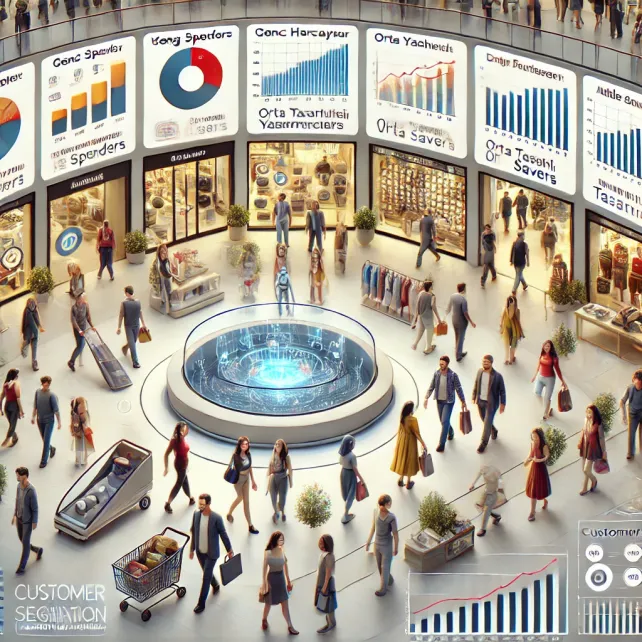

**1. Giriş:**

- **Alan Bilgisi:**
   - Modern perakendecilik dünyasında, müşteri verileri altın değerindedir. Alışveriş merkezleri, müşteri alışkanlıklarını, tercihlerini ve demografik bilgilerini analiz ederek onlara daha özelleştirilmiş deneyimler sunmaya çalışır. Bu tür bir özelleştirme, müşteri sadakatini artırabilir ve satışları teşvik edebilir.

- **Veri Kümesi Tanıtımı:**
   - "Mall_Customers" veri kümesi, bu amacı desteklemek için toplanmış, alışveriş merkezi müşterilerine ait değerli bilgileri içermektedir. Bu veri kümesi, müşterilerin yaş, cinsiyet, yıllık gelir ve harcamaları gibi temel demografik ve ekonomik bilgilerini kapsamaktadır.
  
- **Veri Kümesinin Önemi:**
   - Müşteri segmentasyonu, pazarlama stratejilerini ve kampanyalarını kişiye özel hale getirmek için kritik bir araçtır. "Mall_Customers" veri kümesi, bu segmentasyonun gerçekleştirilmesi için bir temel oluşturarak, perakendecilere ve pazarlamacılara değerli içgörüler sunabilir.

- **Projemizin Amacı:**
   - Bu projede, "Mall_Customers" veri kümesini kullanarak unsupervised learning teknikleri ile müşteri segmentasyonu gerçekleştirmeyi hedefliyoruz. Bu segmentasyon, alışveriş merkezine müşteri davranışları hakkında derinlemesine bilgiler sağlayarak, onlara daha kişiselleştirilmiş hizmetler sunma fırsatı verecektir.


**2. Veri Kümesindeki Özellikler:**
   - **Müşteri Kimliği:** Her müşteriye atanan benzersiz bir kimlik.
   - **Cinsiyet:** Müşterinin cinsiyeti.
   - **Yaş:** Müşterinin yaşı.
   - **Yıllık Gelir:** Müşterinin yıllık geliri.
   - **Harcama Skoru:** Müşterinin harcamalarını temsil eden bir puan (örn. 1-100 arası).


**Sonuç ve Öneriler:**

**1. Segmentasyonun Faydaları:**
   - Alışveriş merkezinin farklı müşteri segmentlerine özel kampanyalar veya promosyonlar düzenleyebilmesi.
   - Müşteri davranışlarını daha iyi anlamak ve onlara daha hedeflenmiş hizmetler sunmak. 
   
**2. Öneriler:**
   - Segmentler arasında önemli farklılıklar gözlemlendiği takdirde, bu farklılıklara yönelik özel stratejiler geliştirmek.
   
- Veri setini hızlı bir şekilde tanıdıktan sonra, Keşifsel Veri Analizi yapmanız beklenir. 
   
- Müşterilerin farklı değişkenlere göre dağılımını gözlemlemeli, değişkenler arasındaki ilişkileri ve korelasyonları keşfetmelisiniz. 
   
- Ardından, küme analizi için kullanılacak farklı değişkenleri belirleyeceksiniz.


**Bu projenin temel amacı, K-Means algoritması ve Hiyerarşik kümeleme ile küme analizi yapmaktır.**

**Etiketleme örneği:**

- Normal Müşteriler (Harcama ve Yıllık Gelir açısından Ortalama bir tüketici)
- Harcama Yapan Müşteriler (Yıllık Gelir daha azdır ancak harcaması yüksektir, dolayısıyla potansiyel hedef müşteri olarak da ele alınabilir.)

## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = df.columns.str.replace(r'\(k\$\)', '', regex=True).str.replace(r'\(1-100\)', '', regex=True)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(" ", "_").str.rstrip("_")

In [5]:
df2 = df.copy()

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    Min = df.min(numeric_only=True)
    Max = df.max(numeric_only=True)
    
    # Calculate the percentage of null values
    NullPercent = (Nulls / obs) * 100
    
    # Calculate the number of duplicate rows
    duplicate_count = df.duplicated().sum()
    
    # Create a new column to store unique values for columns with 10 or fewer unique values, otherwise '-'
    UniqueValues = df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')

    # Display df.shape and duplicate count at the beginning
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    
    if pred is None:
        # Adjusted order with 'Uniques' at a more prominent position
        summary_df = pd.DataFrame({
            'Dtype': Types, 
            'Counts': Counts, 
            'Nulls': Nulls, 
            'NullPercent': NullPercent, 
            'Min': Min, 
            'Max': Max, 
            'Uniques': Uniques,
            'UniqueValues': UniqueValues
        })

    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    return summary_df


In [8]:
summary(df)

1. Data shape (rows, columns): (200, 5)
2. Number of duplicate rows: 0
___________________________
Data Types:
Dtype
int64     4
object    1
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,NullPercent,Min,Max,Uniques,UniqueValues
Age,int64,200,0,0.0,18.0,70.0,51,-
Annual_Income,int64,200,0,0.0,15.0,137.0,64,-
CustomerID,int64,200,0,0.0,1.0,200.0,200,-
Gender,object,200,0,0.0,NaN,NaN,2,"[Male, Female]"
Spending_Score,int64,200,0,0.0,1.0,99.0,84,-


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.drop(columns= "CustomerID", inplace=True)

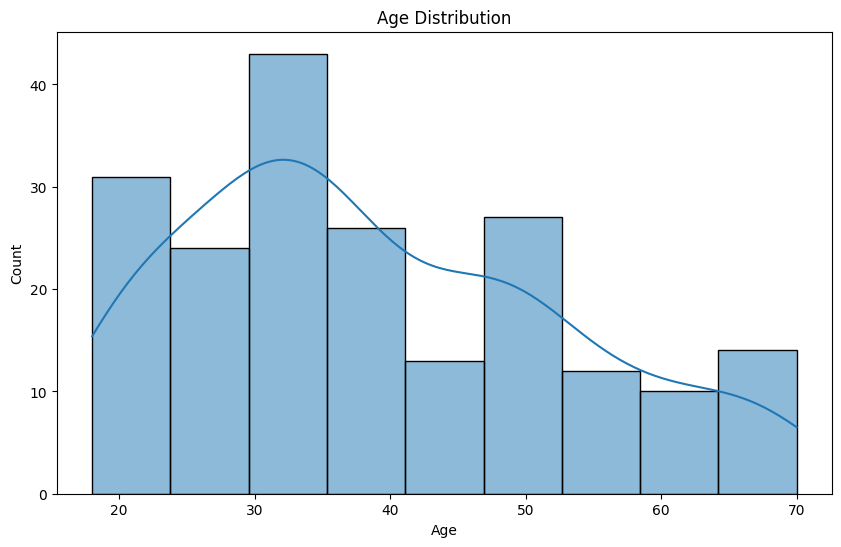

In [11]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

import warnings
warnings.filterwarnings('ignore')

plt.show()

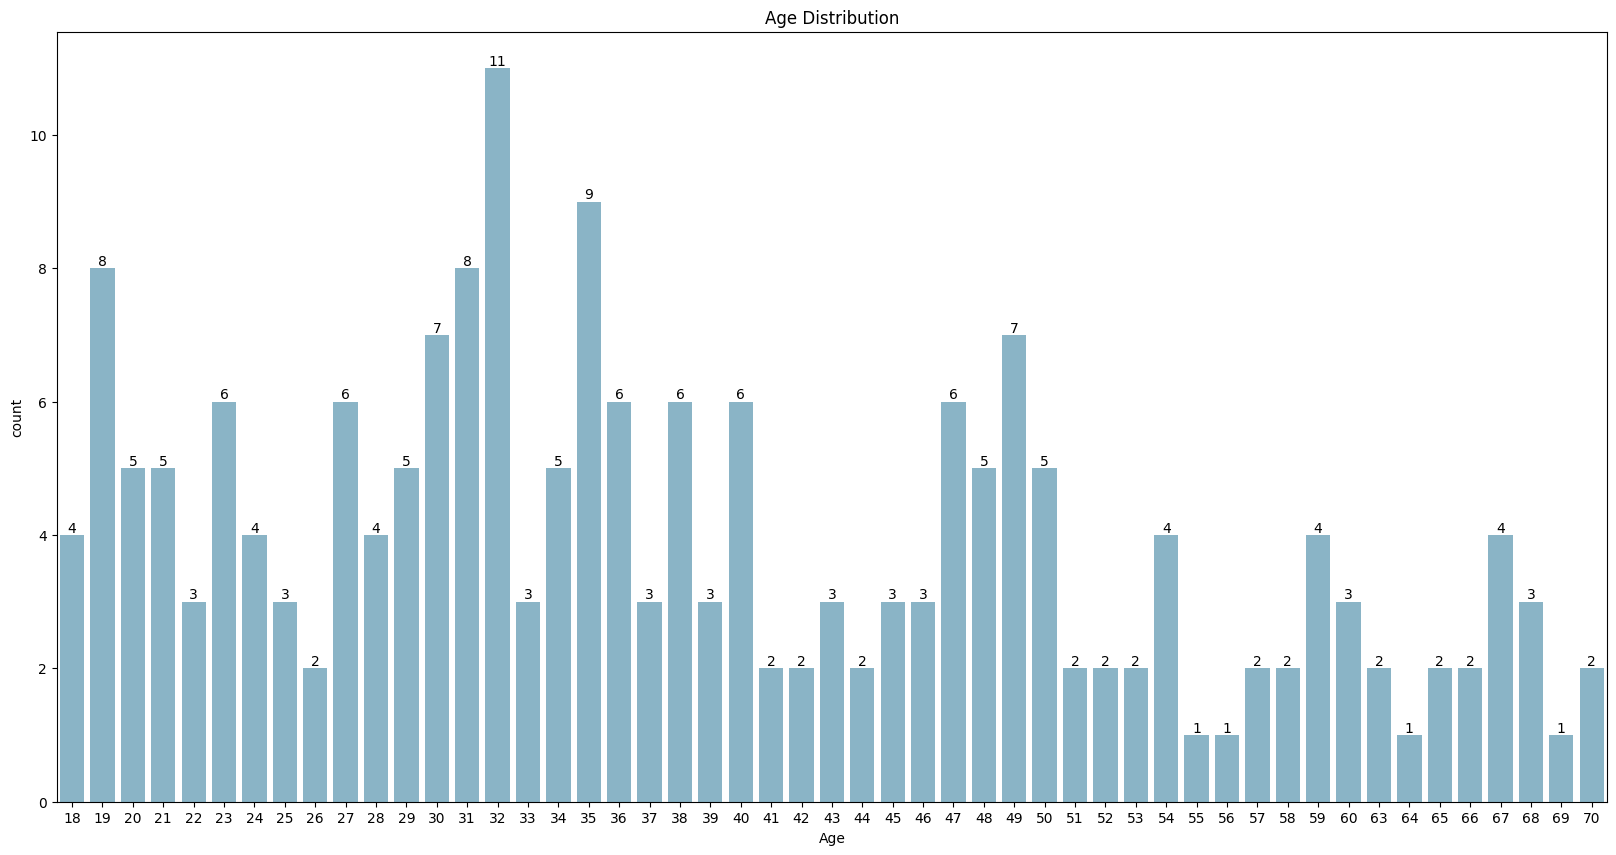

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x ='Age', data = df, color='#80b8d0')
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

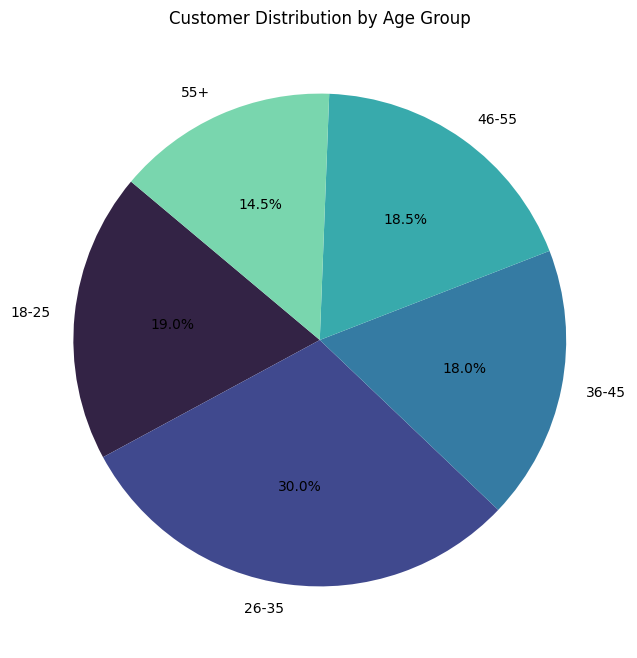

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 56)]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]


plt.figure(figsize=(8, 8))
plt.pie(agey, labels=agex, autopct='%1.1f%%', colors=sns.color_palette("mako", len(agex)), startangle=140)
plt.title("Customer Distribution by Age Group")
plt.show()

**1- Yaş Dağılımı (Age Distribution):**

* Dağılım, genellikle 18-40 yaş aralığında yoğunlaşmış gibi görünüyor. Bu yaş grubunun müşteri kitlesinin büyük bir kısmını oluşturduğu görülüyor. Bu grup, müşteri tabanının önemli bir kısmını oluşturabilir ve pazarlama stratejilerinde önemli bir hedef olabilir. Magaza, daha çok orta ve genç yaş bir kitleye hitap ediyor.

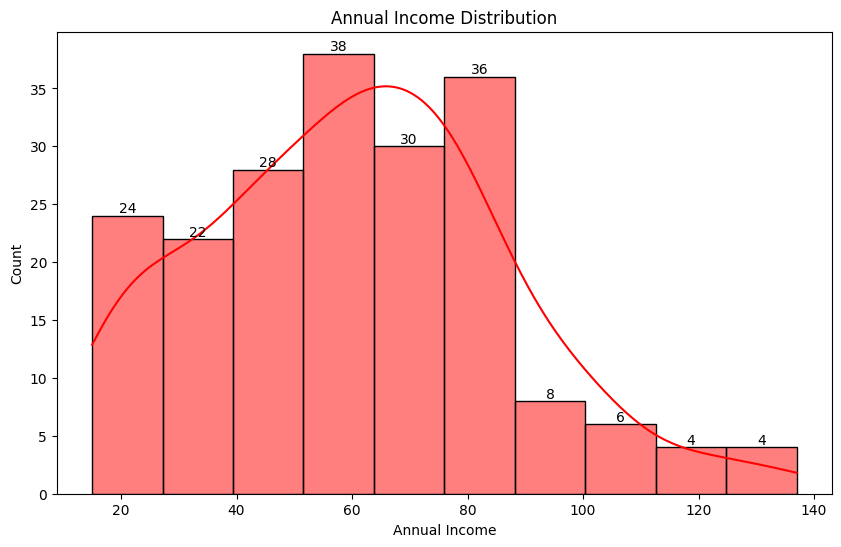

In [14]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x ='Annual_Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

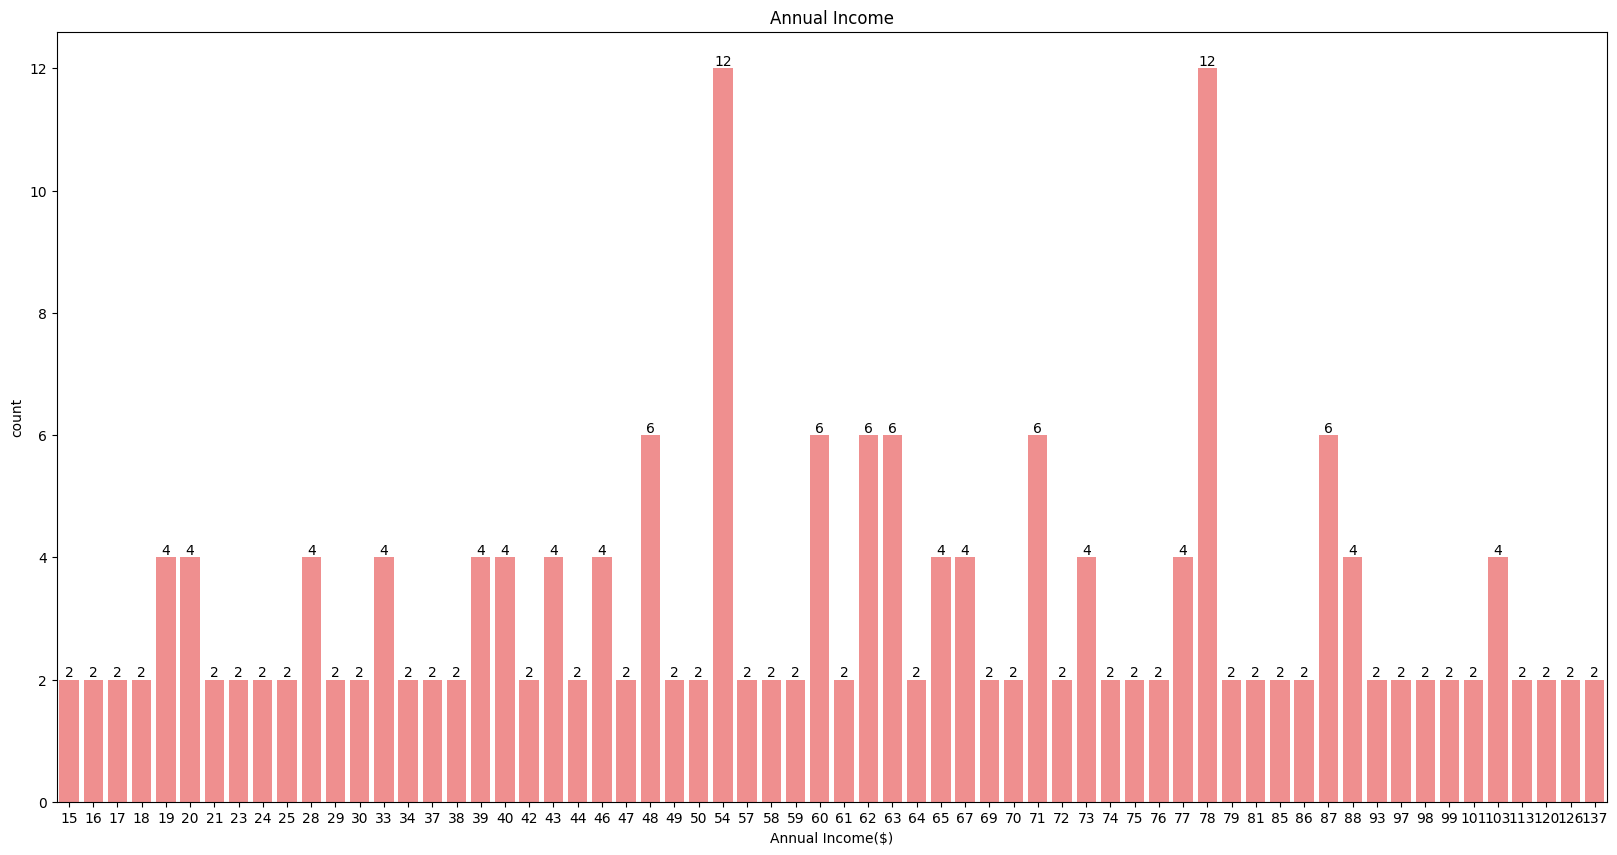

In [15]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual_Income', data=df, color='#ff7f7f')
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

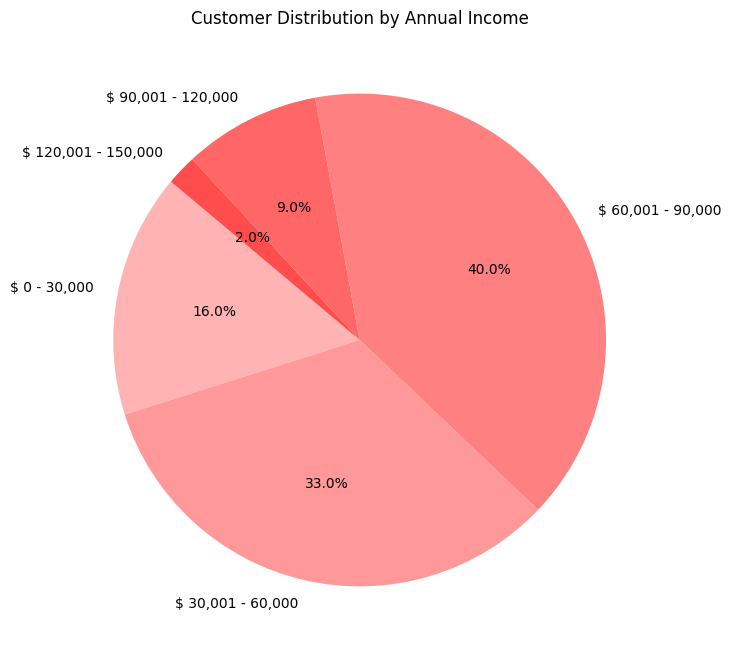

In [16]:
ai0_30 = df["Annual_Income"][(df["Annual_Income"] >= 0) & (df["Annual_Income"] <= 30)]
ai31_60 = df["Annual_Income"][(df["Annual_Income"] > 30) & (df["Annual_Income"] <= 60)]
ai61_90 = df["Annual_Income"][(df["Annual_Income"] > 60) & (df["Annual_Income"] <= 90)]
ai91_120 = df["Annual_Income"][(df["Annual_Income"] > 90) & (df["Annual_Income"] <= 120)]
ai121_150 = df["Annual_Income"][(df["Annual_Income"] > 120) & (df["Annual_Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

colors = ["#FFB3B3", "#FF9999", "#FF8080", "#FF6666", "#FF4D4D"]


plt.figure(figsize=(8, 8))
plt.pie(aiy, labels=aix, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Customer Distribution by Annual Income")
plt.show()



**2- Yıllık Gelir Dağılımı (Annual Income Distribution):**

* Bu grafik, gelirin büyük bir kısmının 54.000 ile 78.000 arasında dağıldığını gösteriyor.
* Yüksek gelir seviyesine sahip müşteriler, müşteri tabanının daha küçük bir bölümünü oluşturuyor. Gelir dağılımı, daha çok ortalama gelir seviyesine sahip müşterilerden oluşuyor. Magaza, orta gelirli bir kitleye hitap ediyor.


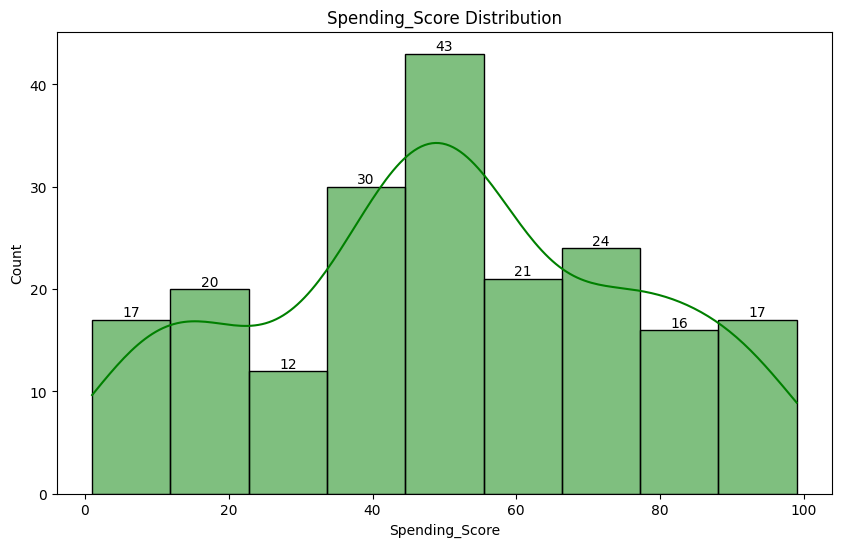

In [17]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x ='Spending_Score', data=df, color='green', kde = True)
plt.title('Spending_Score Distribution')
plt.xlabel('Spending_Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

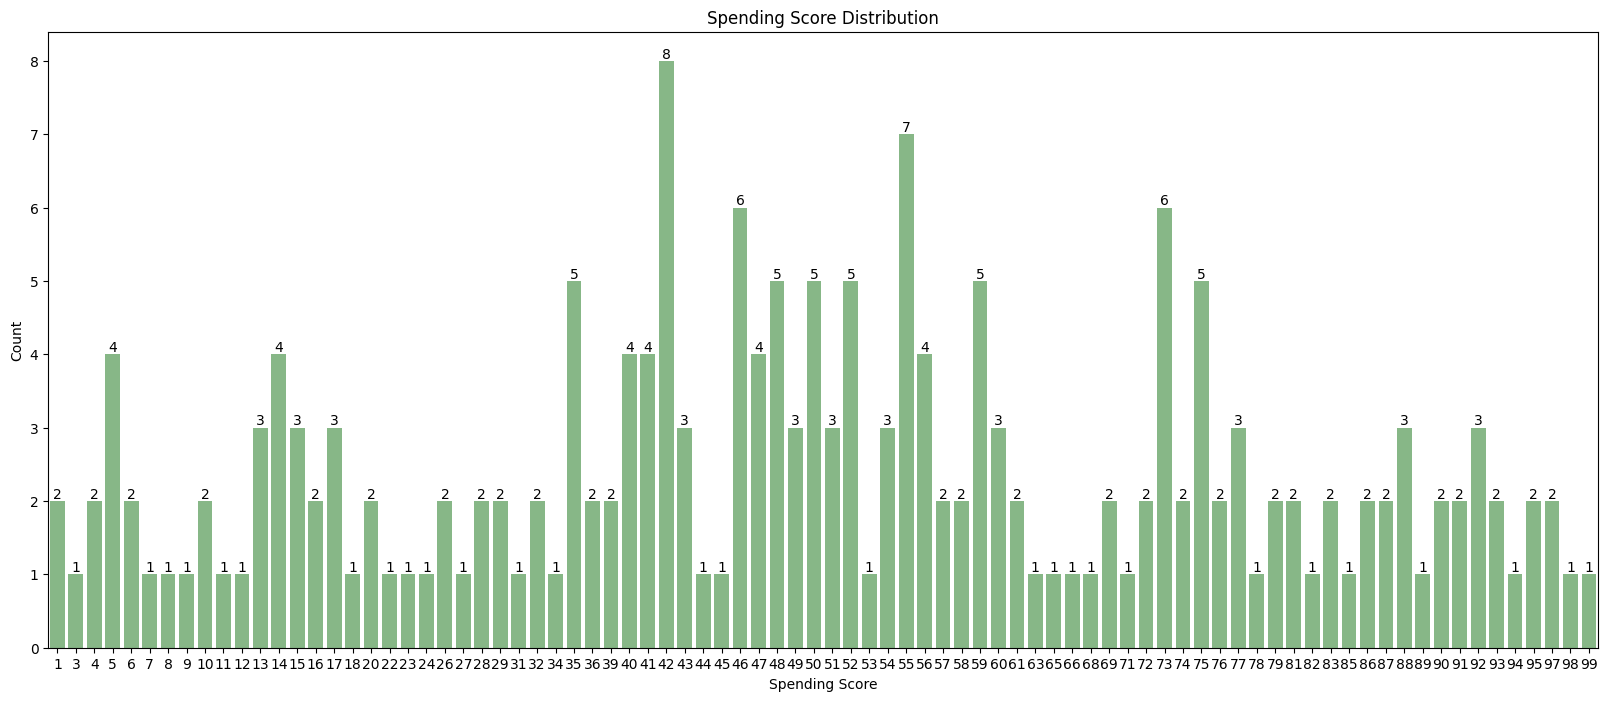

In [18]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending_Score', data=df, color='#7fbf7f',)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

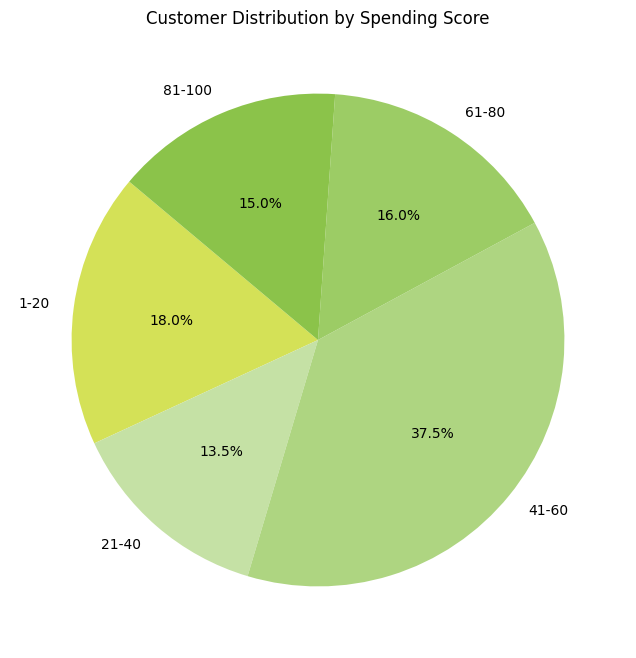

In [19]:
ss_1_20 = df["Spending_Score"][(df["Spending_Score"] >= 1) & (df["Spending_Score"] <= 20)]
ss_21_40 = df["Spending_Score"][(df["Spending_Score"] > 20) & (df["Spending_Score"] <= 40)]
ss_41_60 = df["Spending_Score"][(df["Spending_Score"] > 40) & (df["Spending_Score"] <= 60)]
ss_61_80 = df["Spending_Score"][(df["Spending_Score"] > 60) & (df["Spending_Score"] <= 80)]
ss_81_100 = df["Spending_Score"][(df["Spending_Score"] > 80) & (df["Spending_Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

# Pastel yeşil tonlarında renkler
colors = ["#D4E157", "#C5E1A5", "#AED581", "#9CCC65", "#8BC34A"]

# Pie chart oluşturma
plt.figure(figsize=(8, 8))
plt.pie(ssy, labels=ssx, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Customer Distribution by Spending Score")
plt.show()

**3- Harcama Skoru Dağılımı (Spending Score Distribution):**

* Harcama skorları, genellikle 35-60 aralığında yoğunlaşmış ve bu da orta seviye harcama eğilimine işaret ediyor.Hitap edilen musteri kitlesi orta gelirli oldugu icin bu beklenen bir durum. 
* Dağılımın genel şekli, yıllık gelirdeki gibi birden fazla tepe noktasına sahip olmadan, nispeten simetrik ve normal bir dağılıma yakın görünüyor.


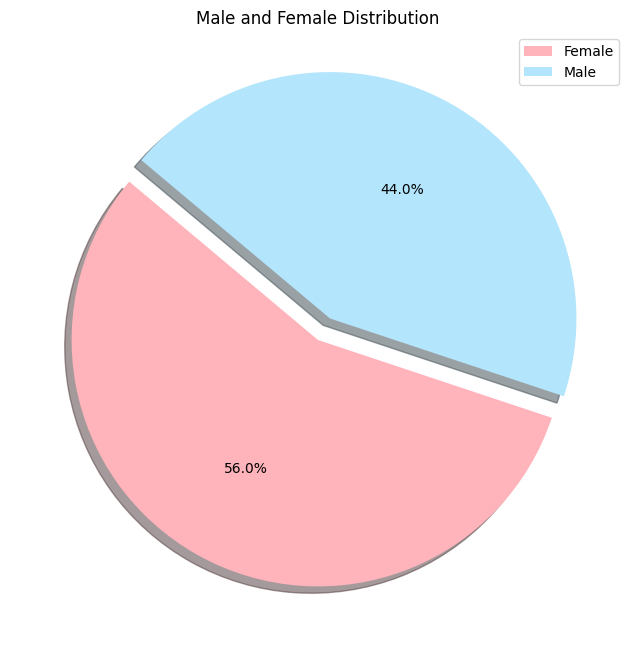

In [20]:
colors = ["#FFB3BA", "#B3E5FC"]

# Pie chart oluşturma
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

plt.show()

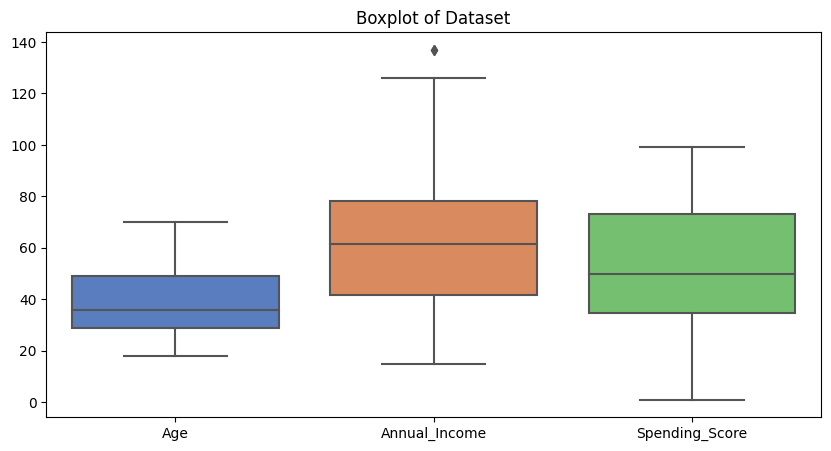

In [21]:
palette = sns.color_palette("muted")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette=palette)
plt.title('Boxplot of Dataset')
plt.show()

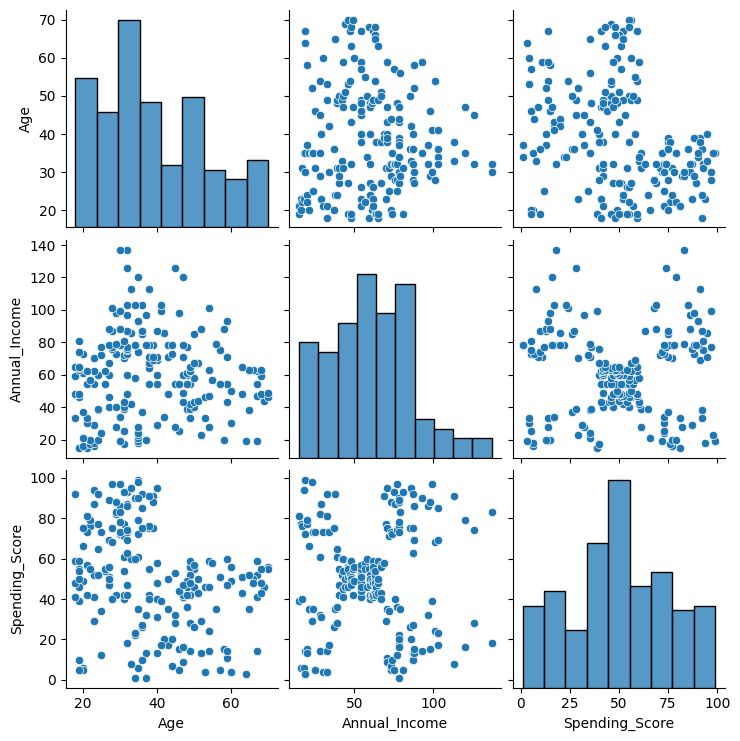

In [22]:
sns.pairplot(df);

**Age ile Annual Income**

- Belirgin bir eğilim görünmüyor, bu da bu iki değişken arasında güçlü bir ilişkinin olmadığını gösteriyor.

**Annual Income ile Spending Score**

- Gelir düzeyi orta aralıkta olan müşterilerin daha yüksek harcama skoruna sahip oldukları görülebiliyor.

**Spending Score ile Age**
- Yaş ve harcama skoru arasındaki grafikte ise, genç müşteriler arasında daha yüksek harcama skorlarına sahip olanların sayısının daha fazla olduğu görülüyor.

**Genel Yorum**:

Bu grafikten, müşteri segmentasyonu yaparken yaş, gelir ve harcama skorunun tek başına bir segmentasyon kriteri olamayacağını, bu faktörlerin kombinasyonlarının daha anlamlı sonuçlar verebileceğini çıkarabiliriz.

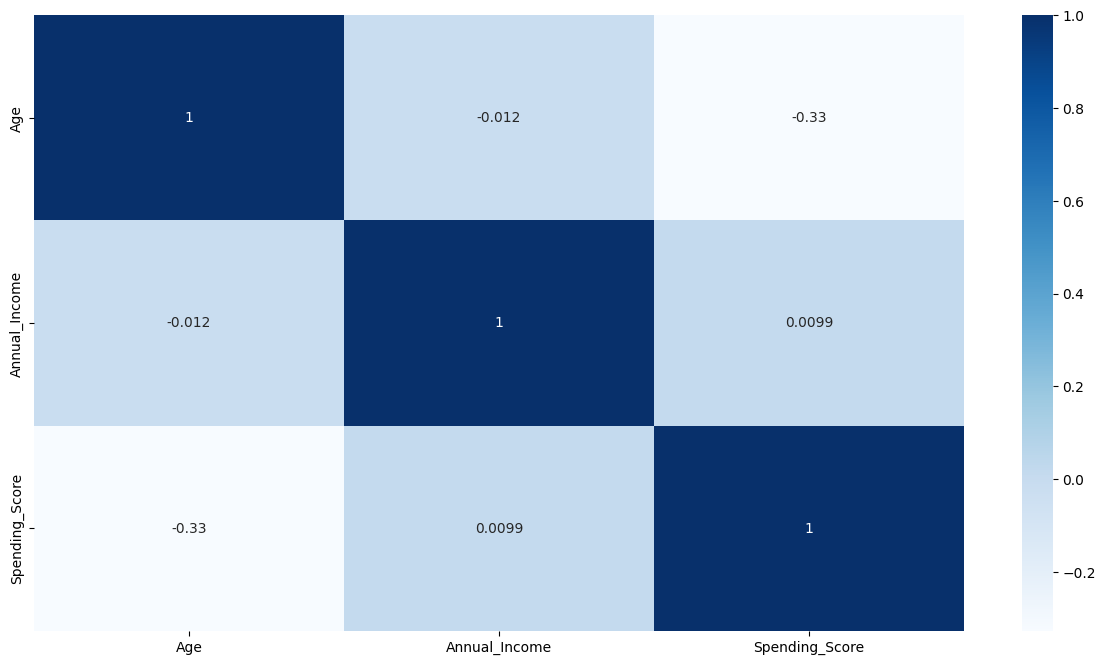

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap="Blues")
plt.show()

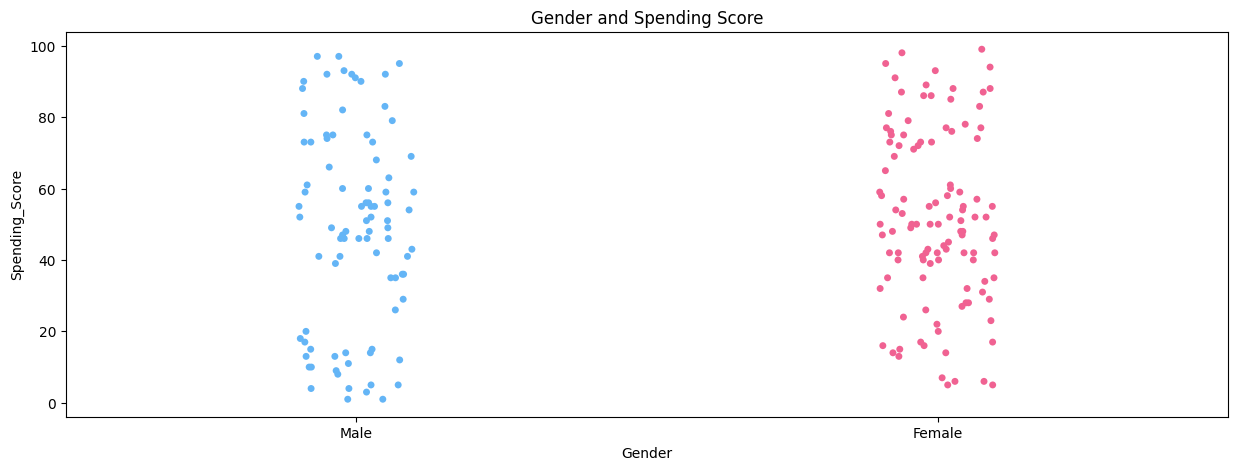

In [24]:
palette = {"Male": "#64B5F6", "Female": "#F06292"}

plt.figure(figsize=(15, 5))
sns.stripplot(x='Gender', y='Spending_Score', data=df, palette=palette)
plt.title('Gender and Spending Score')
plt.show()

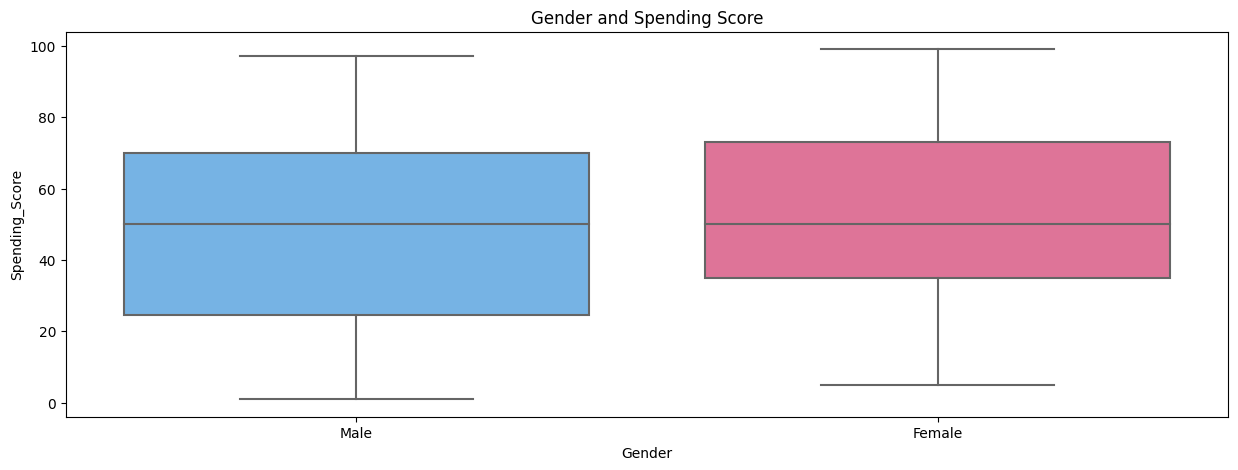

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Gender', y='Spending_Score', data=df, palette=palette)
plt.title('Gender and Spending Score')
plt.show()

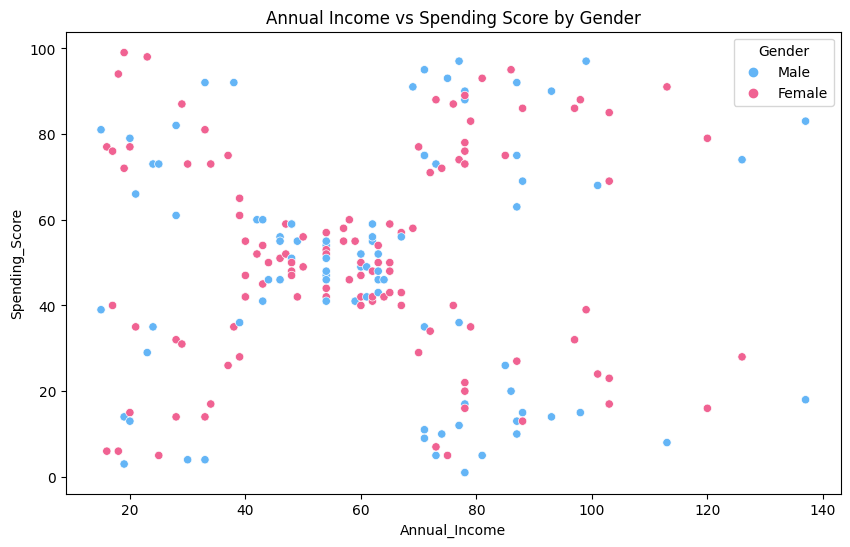

In [26]:
palette = {"Male": "#64B5F6", "Female": "#F06292"}

# Scatter plot oluşturma
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender", palette=palette)
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

Bütün gruplarda erkeklerin ve kadınların dağılımı hemen hemen birbirine eşit, dolayısıyla herhangi bir tarafta yığılma mevcut değil, gruplandırma yaparken grup içerisindeki erkek-kadın dağılımları sağlıklı olacak 

In [27]:
df = df.drop('Gender', axis=1)

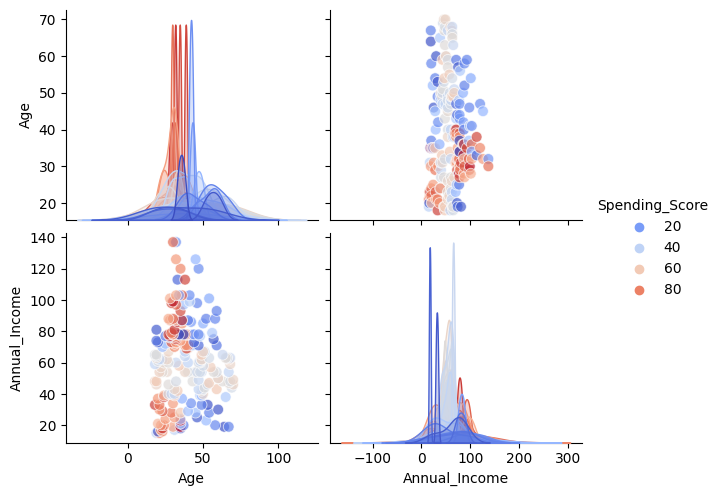

In [28]:
# CustomerID'yi çıkararak daha anlamlı bir grafik için yeniden çiziyoruz
sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score']], 
             hue='Spending_Score', 
             palette='coolwarm', # Daha belirgin bir renk paleti
             plot_kws={'alpha': 0.7, 's': 60}, # Noktaların şeffaflığı ve büyüklüğü
             diag_kws={'shade': True}, # KDE çizgilerinin yumuşatılması
             height=2.5, # Grafiğin boyutunu arttırma
             aspect=1.2) # Grafiğin genişliğini arttırma

plt.show()


- **Age:**  Müşterilerin genellikle 20-40 yaş aralığında olduğunu görüyoruz. Yaş ilerledikçe, müşteri yoğunluğu azalıyor.Yaklaşık 45 yaşın üzerindeki kişilerin harcama skoru genellikle düşük. Grafikte bu yaş grubunda yoğun olarak düşük harcama skoru olan müşteriler bulunuyor, bu da bu çıkarımı destekliyor.
Yüksek harcama skoru olan müşteriler ise genellikle daha genç yaş gruplarında yoğunlaşmış gibi görünüyor.

Gözlemimize göre 3 küme mevcut 1. küme 0-25 yaş karışık spending score, 2. küme 25-40 yaş orta ve üst harcama özellikle bu sınıfa odaklanılmalı, 3. küme 40 yaş üzeri onlarda genelde orta ve düşük harcama scoruna sahipler.

- **Annual Income (Yıllık Gelir):** müşterilerin büyük bir kısmının yıllık gelirlerinin 40-100k aralığında olduğunu görüyoruz. Ancak, gelir arttıkça müşteri sayısı kademeli olarak azalıyor.
- Düşük gelir grubundaki (40K ve altı) müşterilerin harcama skorları hem düşük hem de yüksek olarak dağılmış durumda, bu da harcama alışkanlıklarının gelir seviyesine sıkı bir şekilde bağlı olmadığını gösteriyor.
- Orta gelir grubundaki (40K-70K arası) müşterilerin harcama skorları daha dengeli ve ortalama seviyelerde yoğunlaşmış. Bu grup, gelirine uygun harcama yapma eğiliminde olabilir.
- Yüksek gelir grubundaki (70K ve üstü) müşterilerde harcama skorları büyük farklılık gösteriyor. Bu gelir seviyesindeki müşteriler, harcama alışkanlıkları açısından homojen değil ve çok çeşitli davranışlar sergiliyor.

**Sonuç:**
Gelir seviyesinin harcama skoruna doğrudan bir etkisi olmadığını, özellikle düşük ve yüksek gelir gruplarında büyük çeşitlilik olduğunu söyleyebiliriz. Orta gelir seviyesindeki müşteriler ise daha ortalama harcama alışkanlıklarına sahip gibi görünüyor.

Gözlemimize göre yukarıda scotter plot da bariz 5 küme vardı. Harcama scoruna göre ise 3 küme denebilir. 1. küme 0-40K gelir düşük veya yüksek harcama scoru, 40 K - 70 K ortalama harcama scoru bu tutarlı ve mantıklı, 3. küme 70 K üzeri çok düşük ve çok yüksek harcama scoru . 1. ve 3. küme heterojen olmadığı için üstteki scatter plot tahmini 5 küme olması daha mantıklı geliyor.

Spending Score (harcama skoru) farklı gelir ve yaş gruplarında yaygın olarak görülüyor, bu da müşterilerin harcama alışkanlıklarının sadece yaş veya gelirle açıklanamayacağını gösteriyor.
Bu analiz, müşteri segmentasyonu yaparken bu üç değişkenin bağımsız şekilde ele alınması gerektiğini ve belirli gruplar arasında daha karmaşık ilişkiler olabileceğini gösteriyor.

In [29]:
df.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Cluster Analysis

Aslında yaptığım analize göre tüm featureler arasında korelasyon ve ilişki belirleyemedim fakat gene de tüm data ile bir cluster yapacağım.

## Tüm Data Model

### Scaling

Bu datamızdaki featurelarımız genellikle aynı aralıkta olduğu için scaling yapmayacağız.

### Hopkins test

In [30]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd

def hopkins(data_frame, sampling_size):
    if type(data_frame) != np.ndarray:
        data_frame = pd.DataFrame(data_frame)
        
    if sampling_size > data_frame.shape[0]:
        raise Exception('The number of sample size is bigger than the shape of D')
    
    # Sample n observations from D : X
    data_frame_sample = data_frame.sample(n=sampling_size)
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    
    # Randomly simulate n points with the same variation as in D : Q
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    
    if len(max_data_frame) > 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    
    # Get the distance to their nearest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    
    # Return the Hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    
    return x / (x + y)


In [31]:
hopkins( df, df.shape[0])

array([0.32490565])

### Elbow metod

In [32]:
X = df

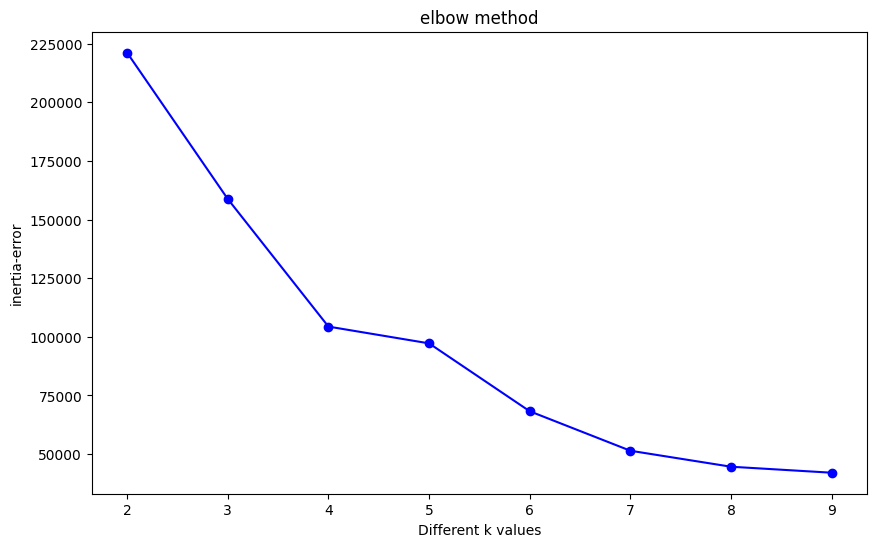

In [33]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)
K = range(2,10)   # minimum 2 küme ile başladık
for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

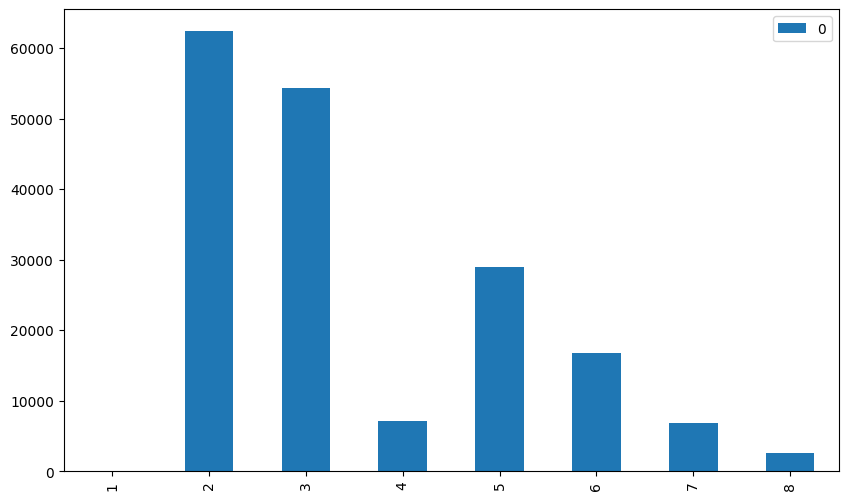

In [34]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar');

### Second Method - Yellowbrick (n_cluster selection)

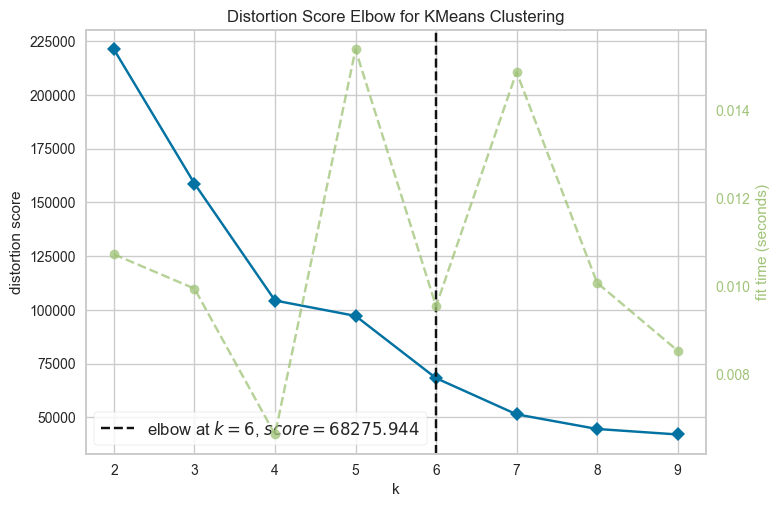

In [35]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 8 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.
visualizer.fit(X)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

### Silhouette analysis

In [36]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3319705845155097
For n_clusters=3, the silhouette score is 0.335580238662684
For n_clusters=4, the silhouette score is 0.40546302077733304
For n_clusters=5, the silhouette score is 0.3575963460506624
For n_clusters=6, the silhouette score is 0.4155672337697055
For n_clusters=7, the silhouette score is 0.4420336177238127
For n_clusters=8, the silhouette score is 0.43280878015743623


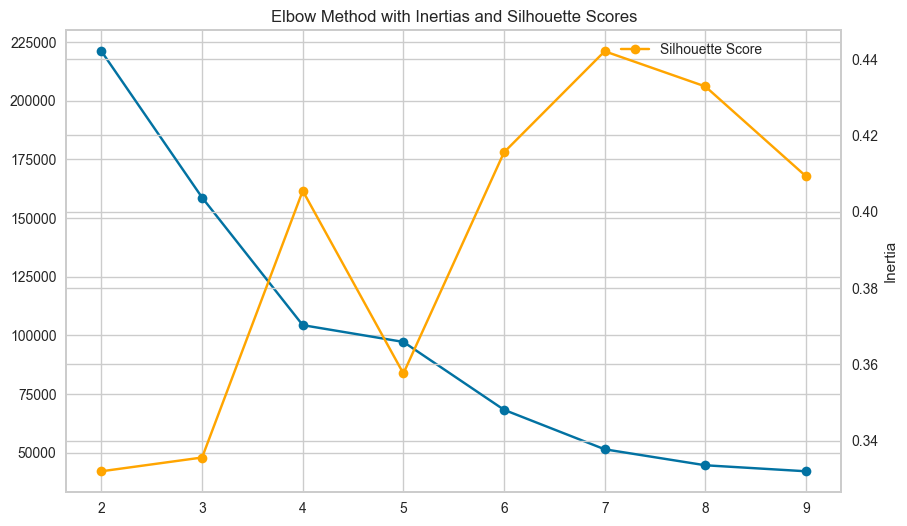

In [37]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

En iyi değer 4 verdi

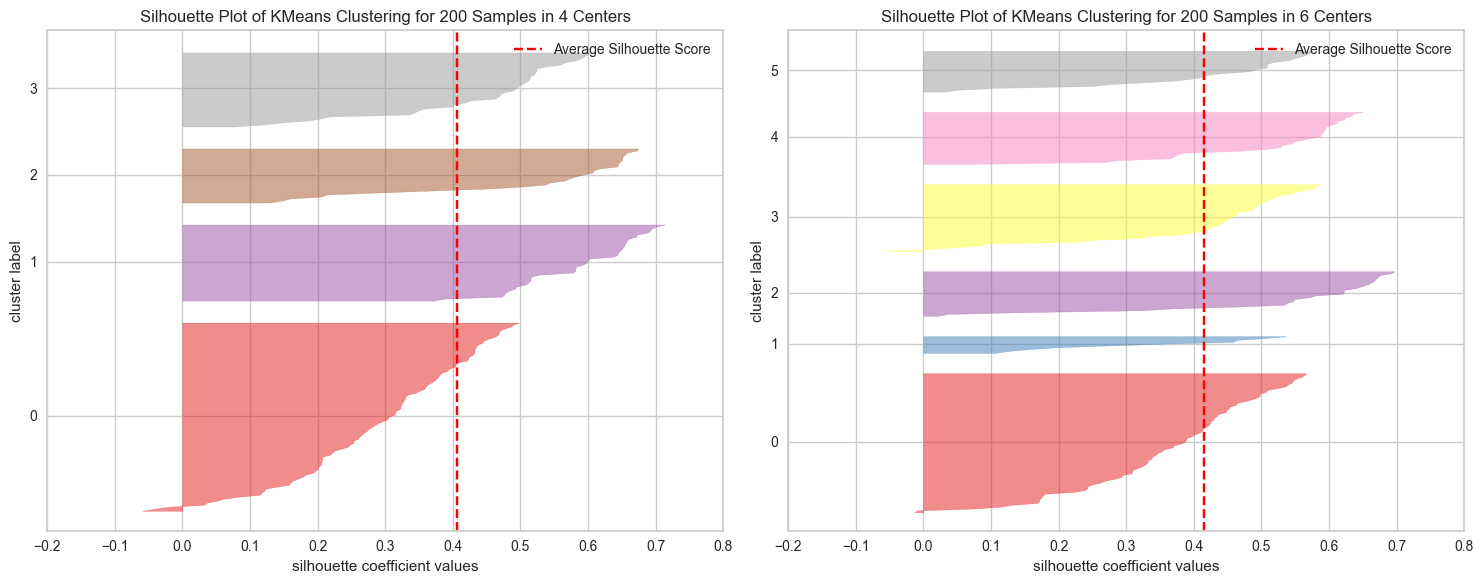

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# İki subplot oluştur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# KMeans modelini oluşturma ve n_clusters=4 için silhouette grafiği çizme
model3 = KMeans(n_clusters=4, random_state=42)
visualizer3 = SilhouetteVisualizer(model3, ax=ax1)  # İlk subplot'a çizim yap
visualizer3.fit(X)  # Veriyi modelle eğit
visualizer3.finalize()  # Çizimi tamamla

# KMeans modelini oluşturma ve n_clusters=6 için silhouette grafiği çizme
model4 = KMeans(n_clusters=6, random_state=42)
visualizer4 = SilhouetteVisualizer(model4, ax=ax2)  # İkinci subplot'a çizim yap
visualizer4.fit(X)  # Veriyi modelle eğit
visualizer4.finalize()  # Çizimi tamamla

plt.tight_layout()
plt.show()


Datamızın featurelerini ayrı ayrı değerlendirmemiz gerektiğini teyit etmiş olduk.

## Age and Spending Score - X1

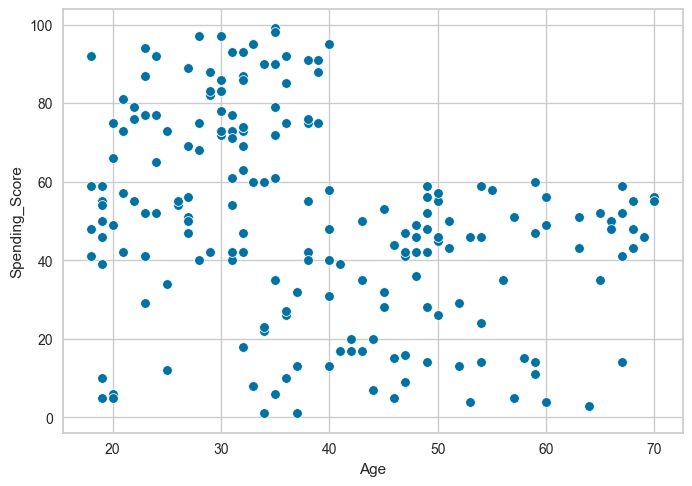

In [39]:
sns.scatterplot(data=df, x='Age', y='Spending_Score'); 

In [40]:
X1 =df[['Age', 'Spending_Score']]

### Hopkins Testi

In [41]:
hopkins( X1, X1.shape[0])

array([0.28279995])

### Elbow Methodu

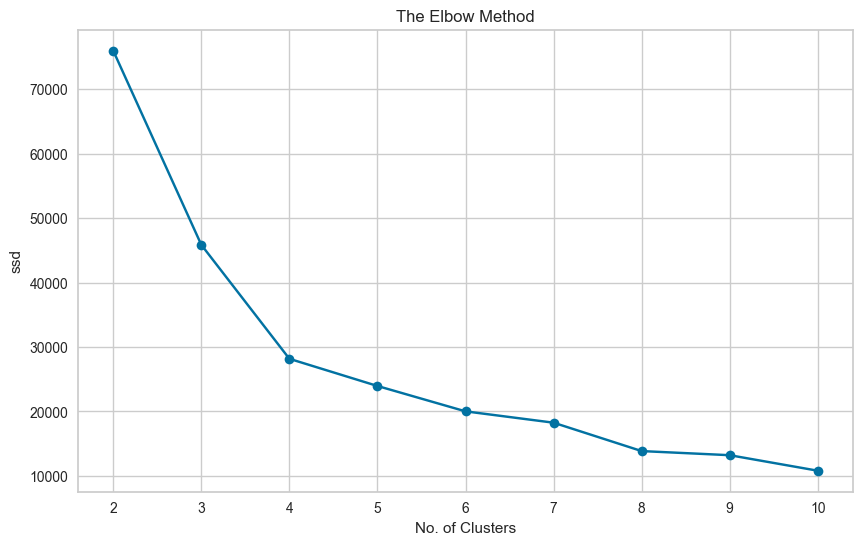

In [42]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

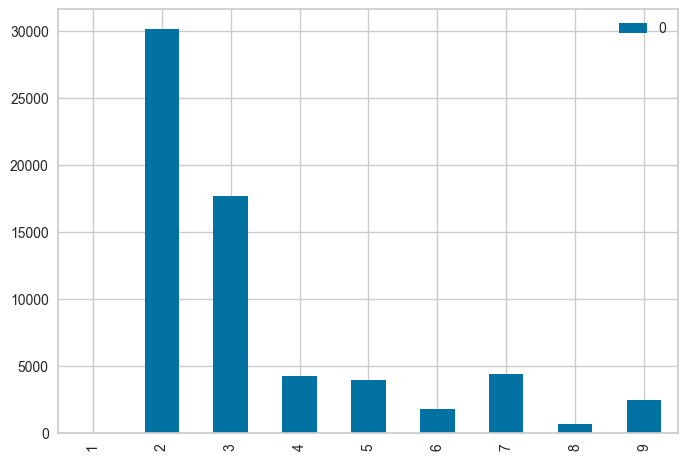

In [43]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar');

Elbow methodu ile 4 K değeri seçildi.

### Second Method - Yellowbrick (n_cluster selection)

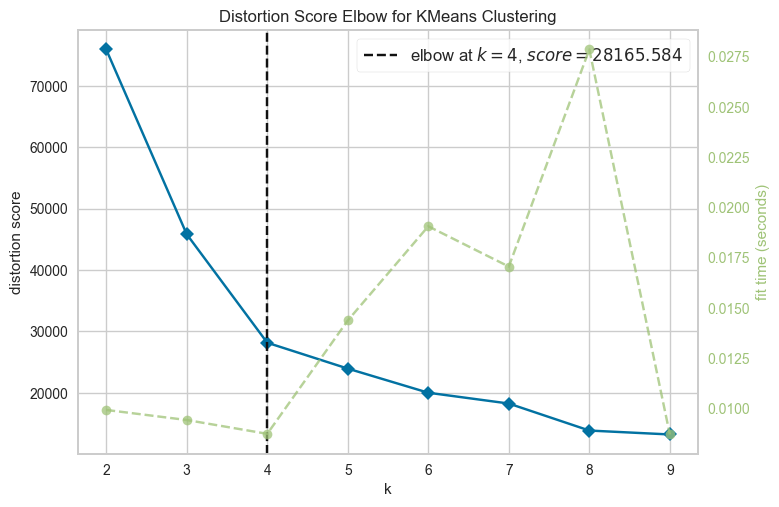

In [44]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.
visualizer.fit(X1)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

Yellow brick methodu da 4 seçti.

### Silhouette analysis

In [45]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44774691157513774
For n_clusters=6, the silhouette score is 0.4044195972499981
For n_clusters=7, the silhouette score is 0.3930185883365383
For n_clusters=8, the silhouette score is 0.39806486273762287


### Silhouette Visualizer

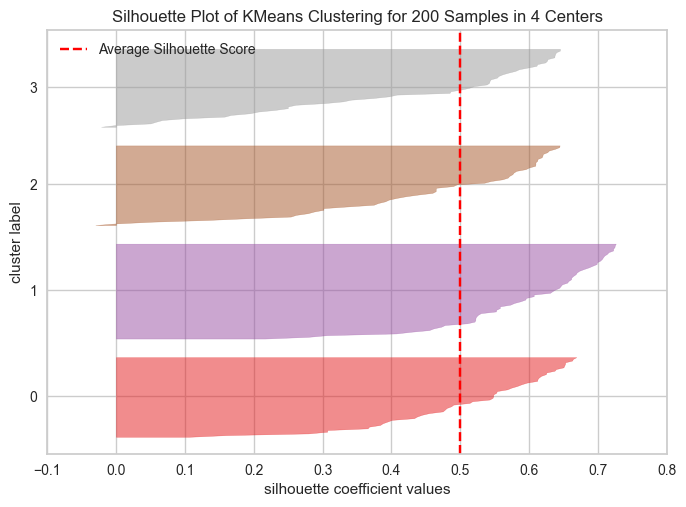

In [46]:
model3 = KMeans(n_clusters=4, random_state=42)  # kmeans = 3 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Building the model based on the optimal number of clusters

In [47]:
model_X1 = KMeans(n_clusters =4, random_state=42)
model_X1.fit_predict(X1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [48]:
cluster = model_X1.labels_ # predict sonuçları
X1["predicted_clusters"] = cluster

In [49]:
X1.head()

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


### Visualization Clusters

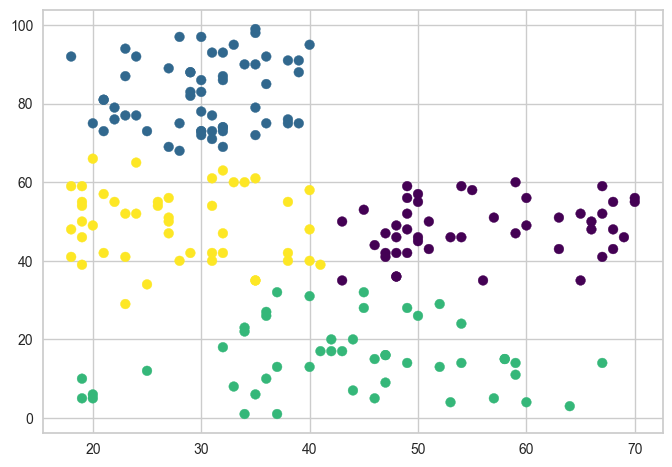

In [50]:
scatter = plt.scatter(X1["Age"], X1["Spending_Score"], c=X1.predicted_clusters, cmap="viridis");

Burada güzel bir kümeleme yapmış görünüyor. İçiçe geçme yok. 

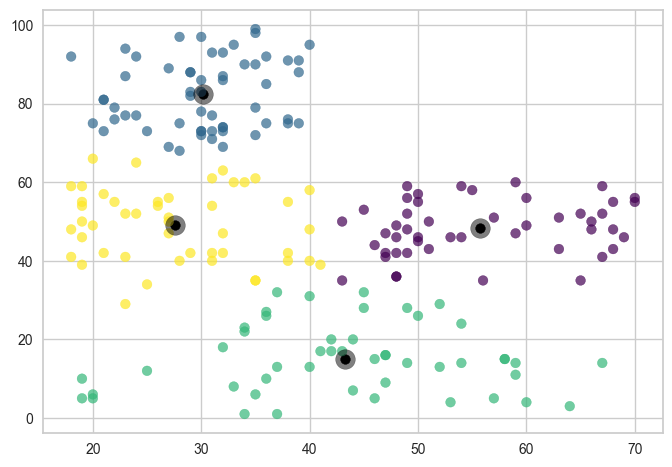

In [51]:
# her bir feature için centroid koordinatlarını bulalım..  Centroid lerin x,y koordinatları
centers = model_X1.cluster_centers_
centers[:,0] # centers of sepal_length feature...  centroid lerin X coordinatları
centers[:,1] # centers of sepal_width feature ...  Centroid lerin Y koordinatları

plt.scatter(centers[:,0], centers[:,1], c = "black");
# merkez noktalarını görelim çizimde

# üstteki grafikte görülen centroid noktalarına bizim data setimizdeki dta point'leri ekleyelim
plt.scatter(X1['Age'], X1['Spending_Score'], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Annual Income and Spending Score - X2

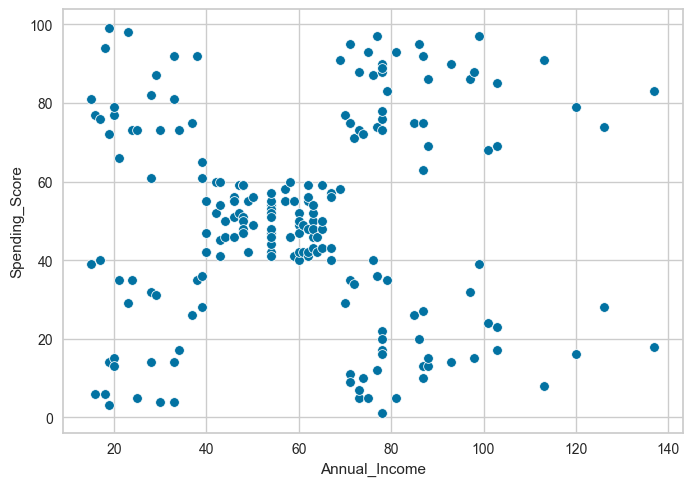

In [52]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score');

In [53]:
X2 = df[['Annual_Income', 'Spending_Score']]

### Hopkins Testi

In [54]:
hopkins( X2, X2.shape[0])

array([0.31171353])

### Elbow Methodu

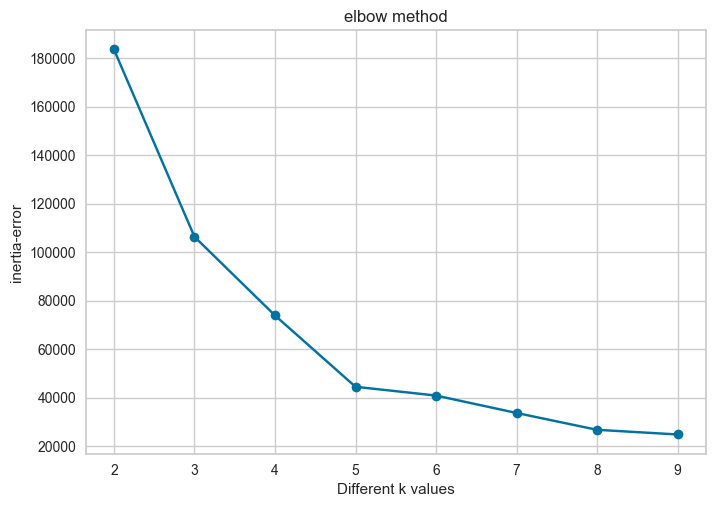

In [55]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)
K = range(2,10)   # minimum 2 küme ile başladık
for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)
    
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

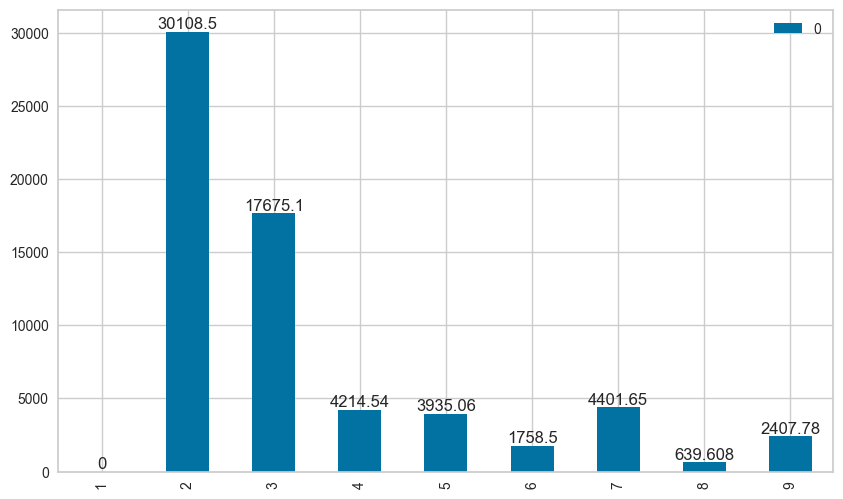

In [56]:
ax = df_diff.plot(kind='bar', figsize=(10,6))
ax.bar_label(ax.containers[0]);

Elbow methodu ile 5 K değeri seçildi.

### Second Method - Yellowbrick (n_cluster selection)

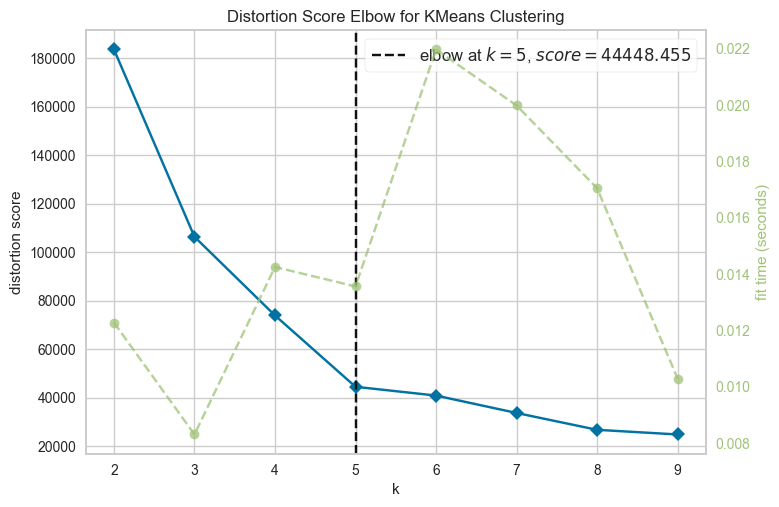

In [57]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.
visualizer.fit(X2)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

### Silhouette analysis

In [58]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.39564531743995546
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4937945814354117
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5128405328004378
For n_clusters=7, the silhouette score is 0.5017174409749505
For n_clusters=8, the silhouette score is 0.4962769338093321


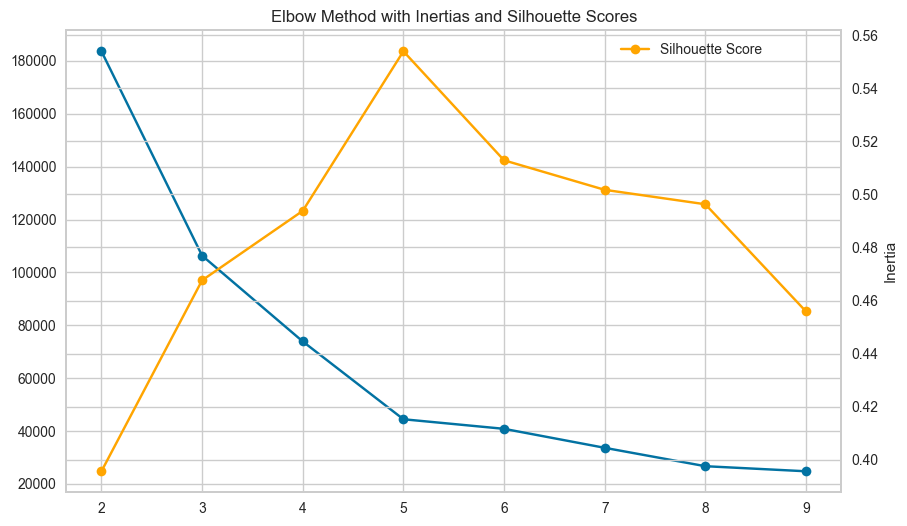

In [59]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik
inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X2)
    silhouette = silhouette_score(X2, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

Daha önce EDA dan da yapığım detaylı analizlere paralel olarak K :5 inertia değeri en yüksek bu grafiğe bakıp 5 değeri ile ilerliyoruz.

### Silhouette Visualizer

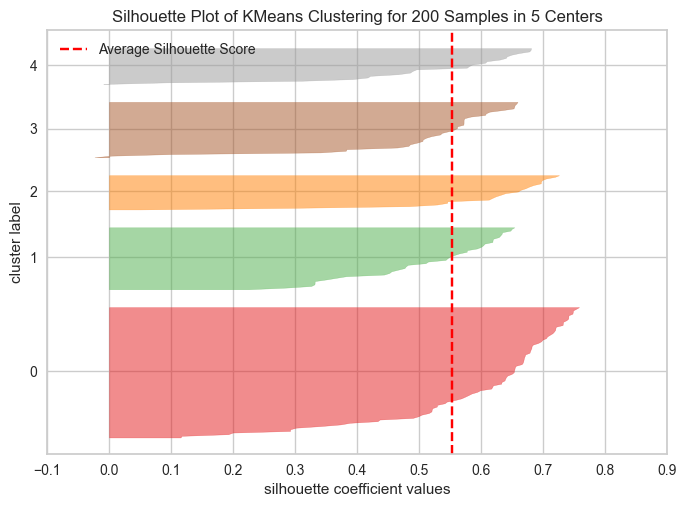

In [60]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

K3 de 2 nolu küme bir çok kümeyi yutmuştu. 5 K kümesi daha iyi

### Building the model based on the optimal number of clusters

In [61]:
model_X2 = KMeans(n_clusters =5, random_state=42)
model_X2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [62]:
cluster = model_X2.labels_ # predict sonuçları
X2["predicted_clusters"] = cluster
X2.head()

,Annual_Income,Spending_Score,predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


### Visualization Clusters

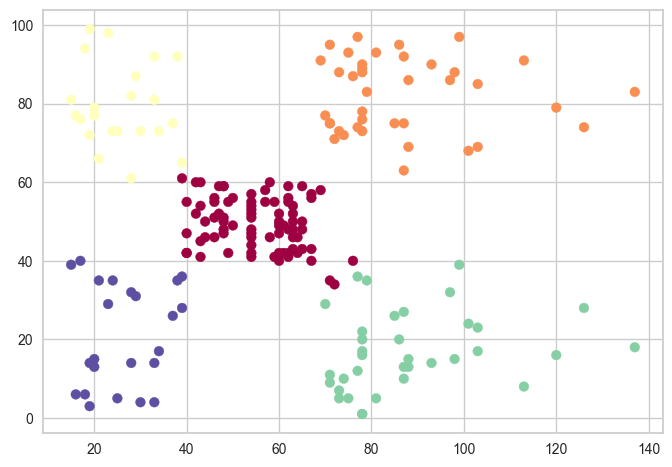

In [63]:
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c = X2.predicted_clusters, cmap = "Spectral");

Tam olarak beklediğim gibi geldi sonuç. EDA da yaptığım incelemelerede de düşük gelir seviyesi ve yüksek gelir seviyesi heterojendi burada homojen olarak ayrılmış görünüyorlar ve orta kısım orta gelir seviyesine aitti tutarlı ve homojen dağılmıştı.

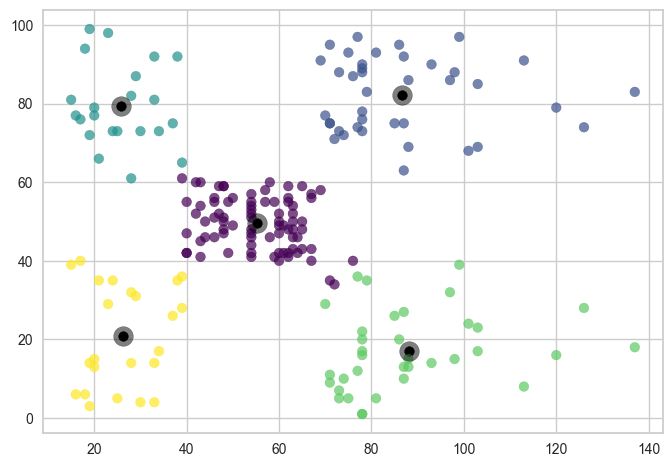

In [64]:
# her bir feature için centroid koordinatlarını bulalım..  Centroid lerin x,y koordinatları
centers = model_X2.cluster_centers_
centers[:,0] # centers of sepal_length feature...  centroid lerin X coordinatları
centers[:,1] # centers of sepal_width feature ...  Centroid lerin Y koordinatları

plt.scatter(centers[:,0], centers[:,1], c = "black");
# merkez noktalarını görelim çizimde

# üstteki grafikte görülen centroid noktalarına bizim data setimizdeki dta point'leri ekleyelim
plt.scatter(X2['Annual_Income'], X2['Spending_Score'], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Hierarchical Clustering

## Age and Spending Score- X1

In [65]:
X1 = df[['Age', 'Spending_Score']]

### Dendrogram

In [81]:
hc_ward = linkage(y = df, method = "ward") # df  seti için 'ward' yöntemiyle birleştirici hiyerarşik kümeleme gerçekleştirir.
hc_complete = linkage(df, "complete")  # complete' veya 'maksimum' yöntemini kullanır
hc_average = linkage(df, "average")  # tüm çiftler arasındaki ortalama uzaklığı kullanarak kümeleri birleştirir
hc_single = linkage(df, "single")  # Single' veya 'minimum' yöntemi, kümeler arasındaki en yakın noktaları dikkate alı

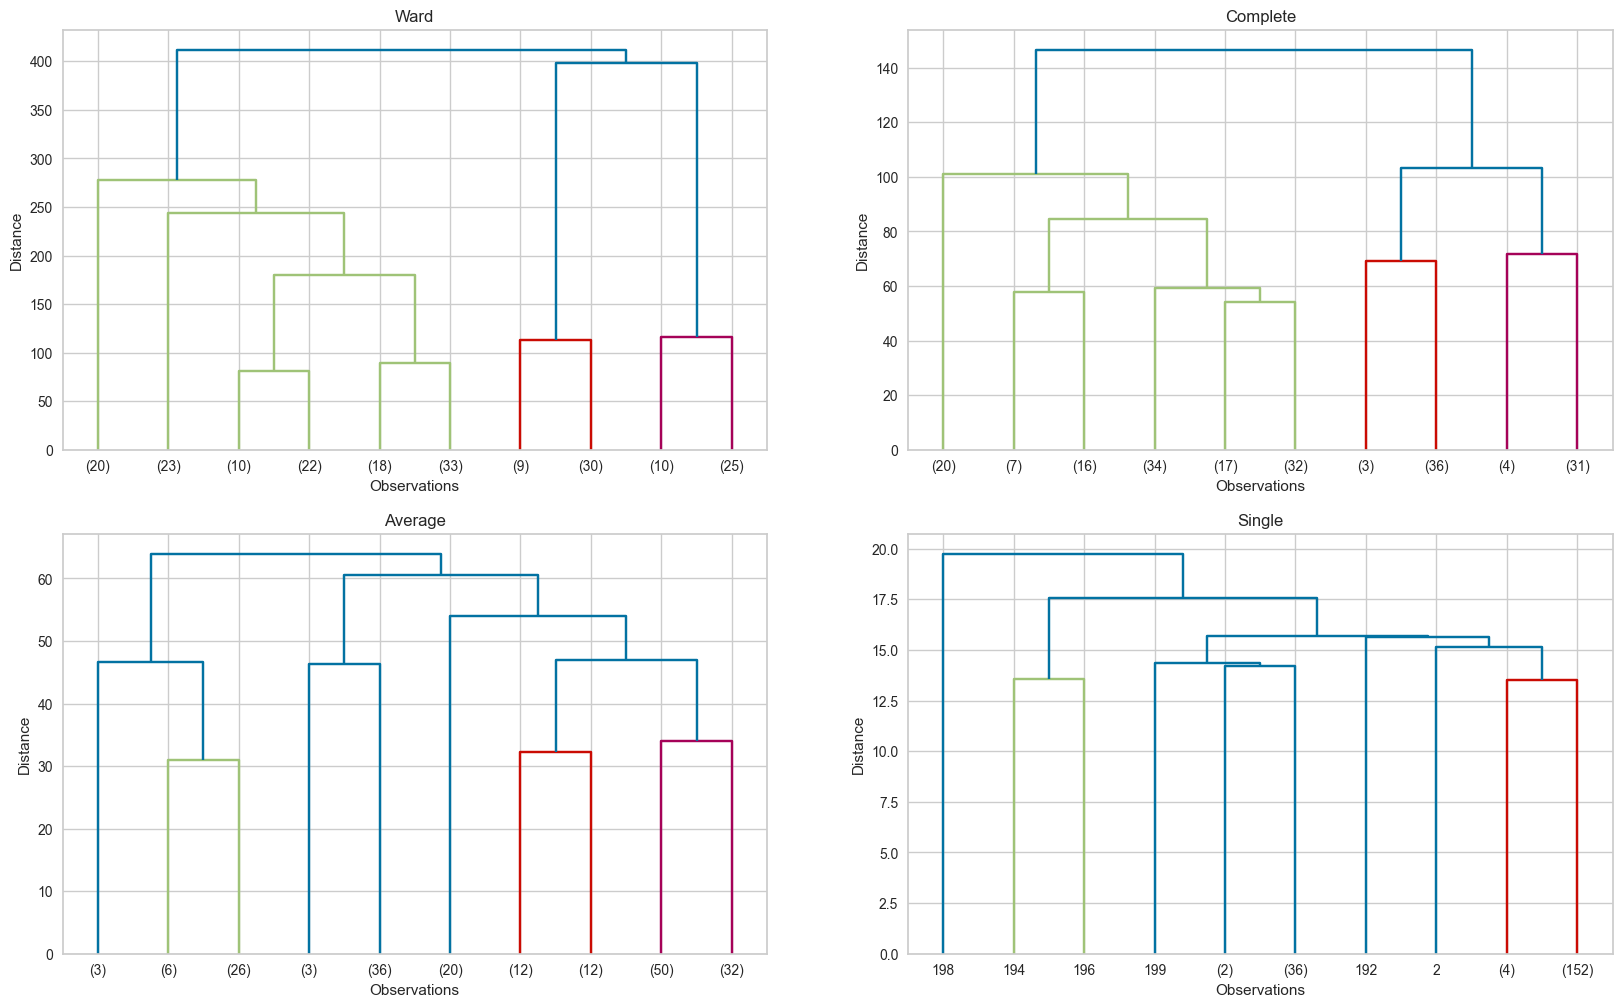

In [82]:
plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Silhouette Score

In [83]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4543361265538767
For n_clusters=3, the silhouette score is 0.4405235894783804
For n_clusters=4, the silhouette score is 0.4627613815448594
For n_clusters=5, the silhouette score is 0.4069557384180493
For n_clusters=6, the silhouette score is 0.415428459029625
For n_clusters=7, the silhouette score is 0.4184942312384679
For n_clusters=8, the silhouette score is 0.3907066105559311
For n_clusters=9, the silhouette score is 0.3971576861327019
For n_clusters=10, the silhouette score is 0.39090545505791163


### Hierarchical Clustering (Agglomerative)

In [84]:
Agg1 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

In [85]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score,Cluster_ID_X1,cluster_Agg
0,19,39,0,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,0,0


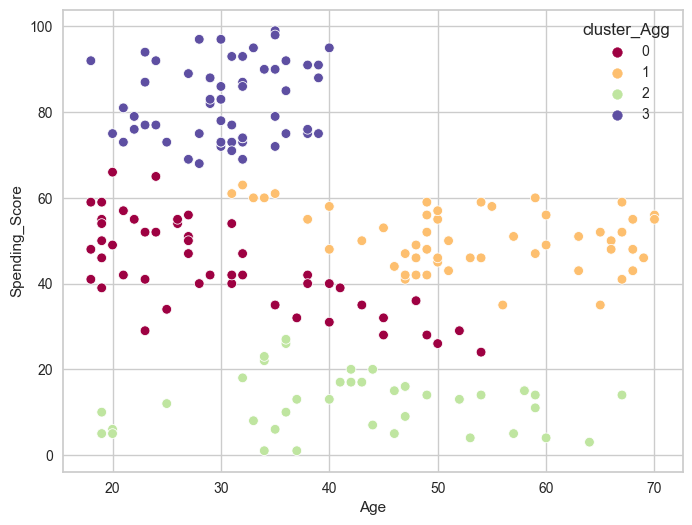

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=X1, palette="Spectral");

Kmeans görselleştirmesi

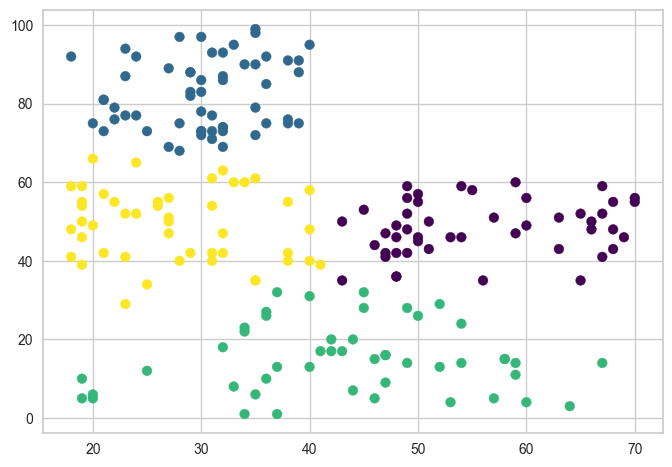

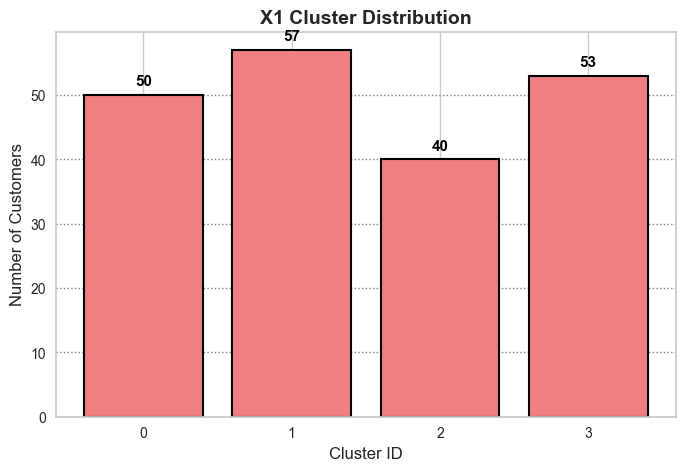

In [80]:
clusters = [0, 1, 2, 3]
counts = [50, 57, 40, 53]

plt.figure(figsize=(8, 5))

bars = plt.bar(clusters, counts, color='lightcoral', edgecolor='black', linewidth=1.5)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.title('X1 Cluster Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.grid(axis='y', linestyle=':', linewidth=1, color='gray')
plt.xticks(clusters)

plt.show()

## Clustering based on Annual Income and Spending Score- X2

In [87]:
X2 = df[['Annual_Income', 'Spending_Score']]

### Dendrogram

In [104]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

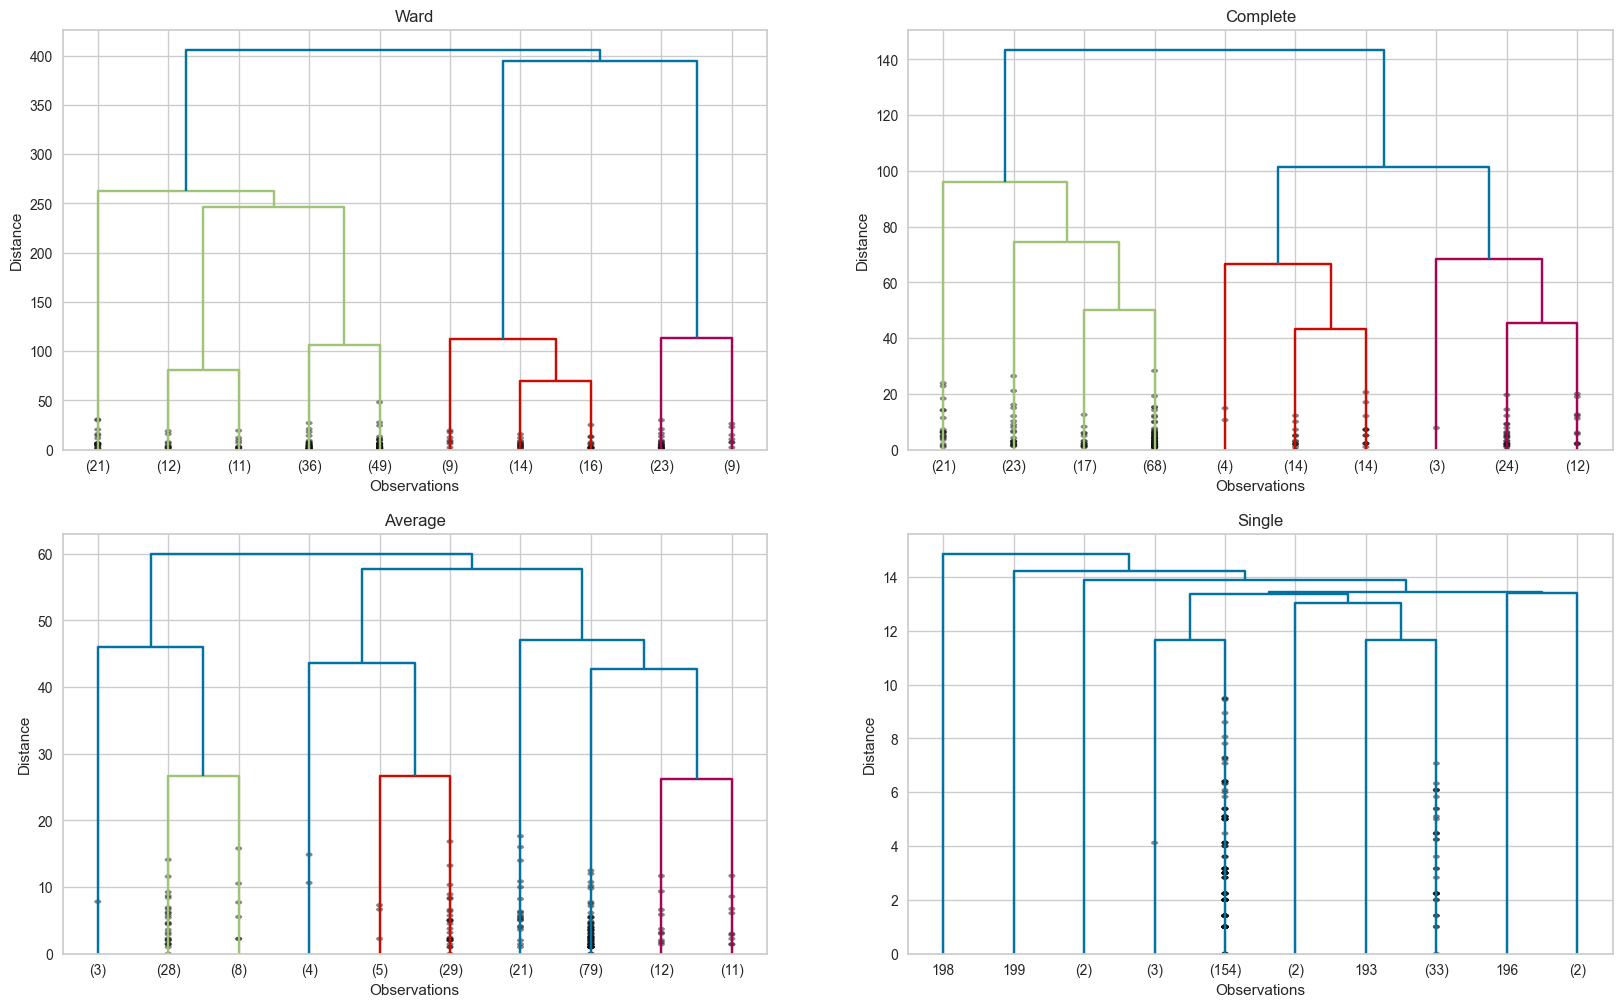

In [105]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);


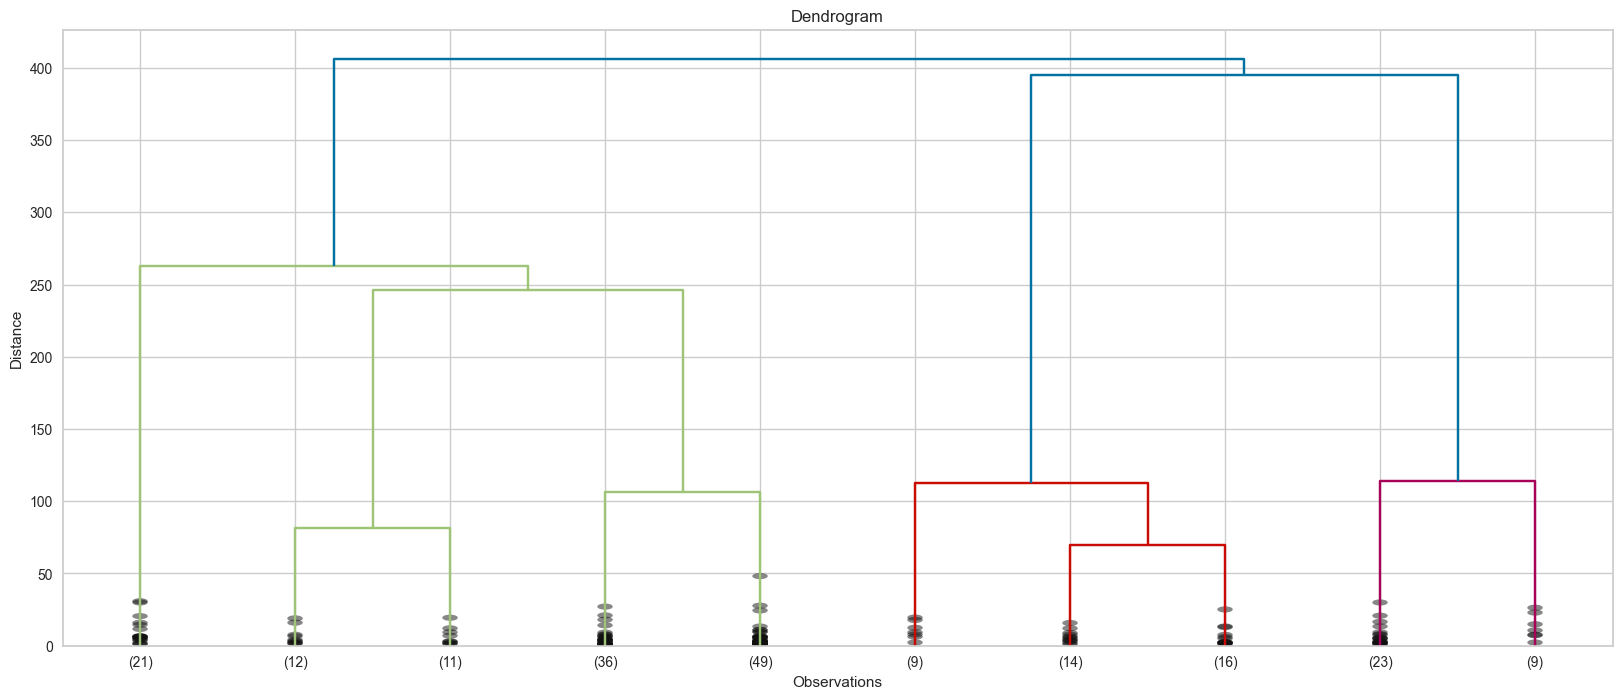

In [106]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Silhouette Score

In [107]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36732588454818116
For n_clusters=3, the silhouette score is 0.4621165419327909
For n_clusters=4, the silhouette score is 0.49186694411118576
For n_clusters=5, the silhouette score is 0.5534488444234398
For n_clusters=6, the silhouette score is 0.5384639868151179
For n_clusters=7, the silhouette score is 0.5203286406556873
For n_clusters=8, the silhouette score is 0.4329396493017606
For n_clusters=9, the silhouette score is 0.4392542731146716
For n_clusters=10, the silhouette score is 0.4345869624770184


### Hierarchical Clustering (Agglomerative)

In [108]:
Agg2 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

In [109]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score,Cluster_ID_X1,cluster_Agg
0,19,39,0,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,0,0


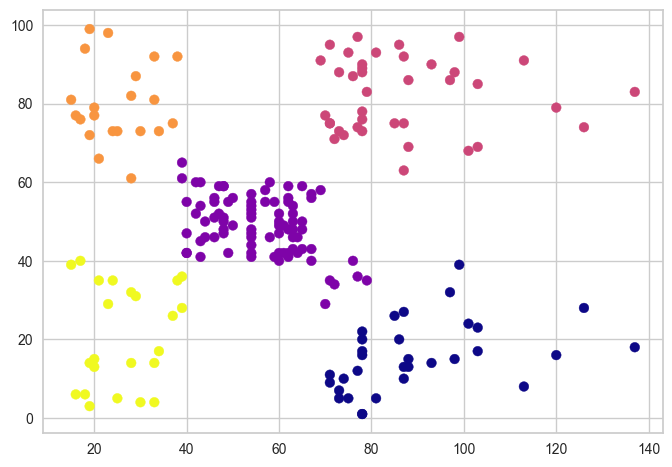

In [89]:
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=cluster.labels_, cmap='plasma')


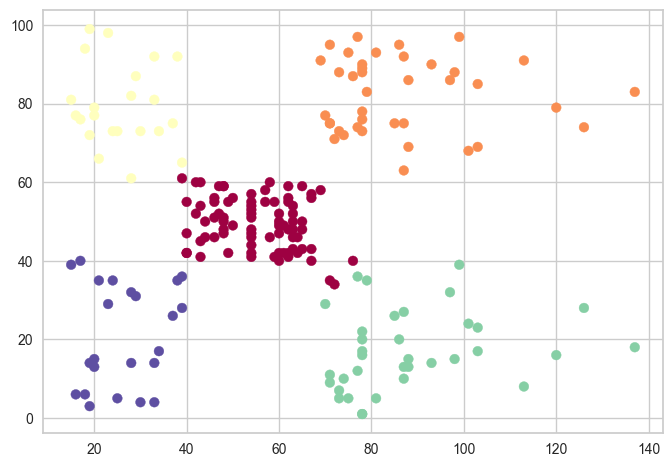

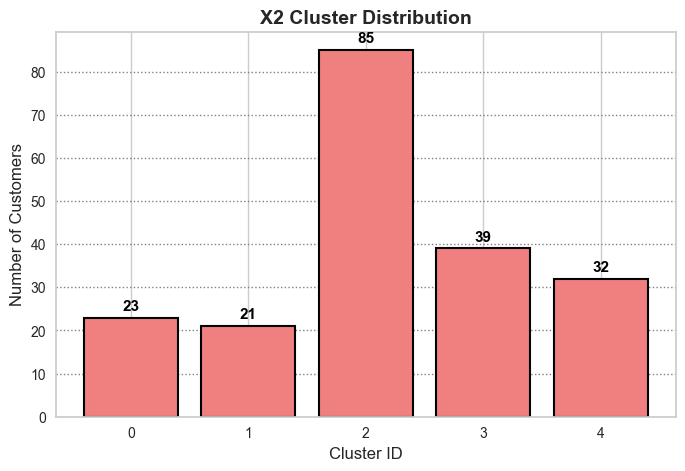

In [103]:
clusters = [0, 1, 2, 3, 4]
counts = [23, 21, 85, 39, 32]

plt.figure(figsize=(8, 5))
bars = plt.bar(clusters, counts, color='lightcoral', edgecolor='black', linewidth=1.5)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.title('X2 Cluster Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.grid(axis='y', linestyle=':', linewidth=1, color='gray')
plt.xticks(clusters)

plt.show()

# Conclusion

## Interpretation based on Age and Spending Score- X1

In [161]:
X1 =df[['Age', 'Spending_Score']]
model_X1 = KMeans(n_clusters =4, random_state=42)
model_X1.fit_predict(X1)
cluster = model_X1.labels_ # predict sonuçları
X1["cluster_Kmeans"] = cluster
X1.head()

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


In [162]:
X1.cluster_Kmeans.value_counts()

cluster_Kmeans
1    57
2    48
0    48
3    47
Name: count, dtype: int64

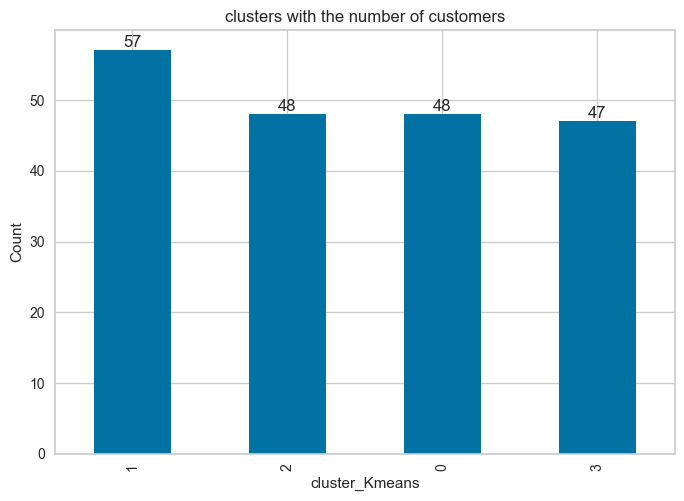

In [163]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

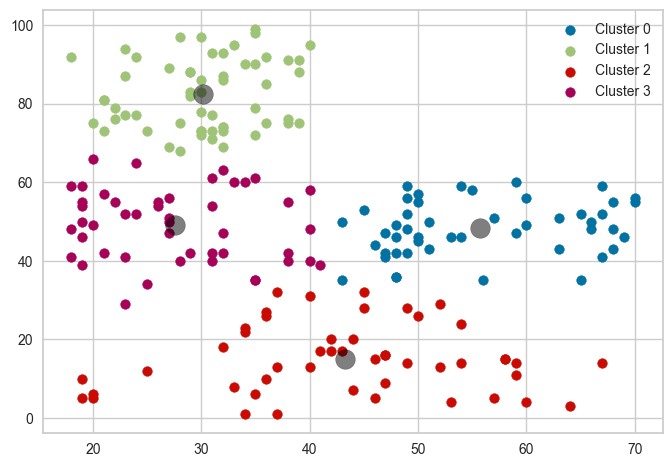

In [143]:
# her bir feature için centroid koordinatlarını bulalım.. Centroid lerin x,y koordinatları
centers = model_X1.cluster_centers_

# Kümeler için ayrı ayrı scatter plot ekleyelim
for cluster_id in range(len(centers)):
    plt.scatter(X1[X1.cluster_Kmeans == cluster_id]['Age'], 
                X1[X1.cluster_Kmeans == cluster_id]['Spending_Score'], 
                label=f'Cluster {cluster_id}')

# Centroid noktalarını çizelim
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Legend'i göster
plt.legend()
plt.show()


In [167]:
df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [168]:
df2["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [169]:
cluster_mapping = {
    0: "Orta Yaşlı Yatırımcılar",
    1: "Orta Yaşlı Tasarrufçular",
    2: "Genç Tasarrufçular",
    3: "Genç Harcayanlar"
}

# 'cluster_Kmeans' sütunundaki 0, 1, 2, 3 değerlerini yeni isimlerle değiştirin
df2['cluster_Age_Spending_Score'] = df2['cluster_Age_Spending_Score'].map(cluster_mapping)

df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,Male,19,15,39,Genç Harcayanlar
1,2,Male,21,15,81,Orta Yaşlı Tasarrufçular
2,3,Female,20,16,6,Genç Tasarrufçular
3,4,Female,23,16,77,Orta Yaşlı Tasarrufçular
4,5,Female,31,17,40,Genç Harcayanlar


In [171]:
df2.cluster_Age_Spending_Score.value_counts()

cluster_Age_Spending_Score
Orta Yaşlı Tasarrufçular    57
Genç Tasarrufçular          48
Orta Yaşlı Yatırımcılar     48
Genç Harcayanlar            47
Name: count, dtype: int64

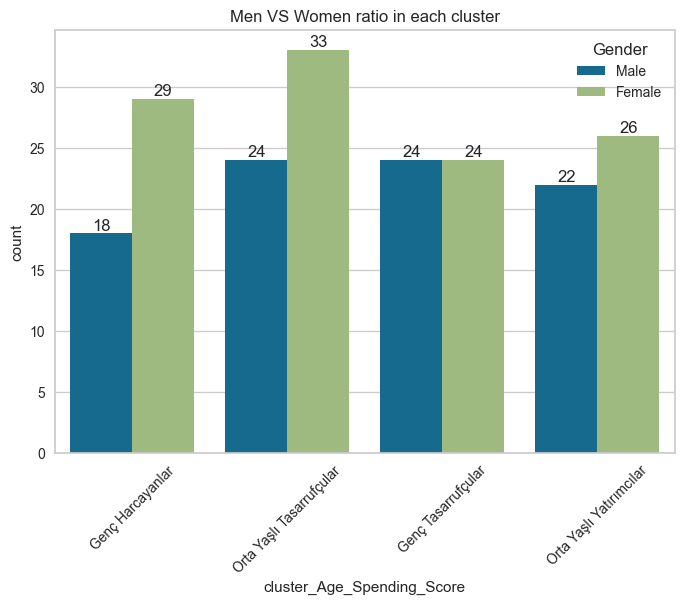

In [176]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df2.cluster_Age_Spending_Score, hue=df2.Gender)
plt.xticks(rotation=45)
for p in ax.containers:
    ax.bar_label(p)
    
plt.show()

 0: "Orta Yaşlı Yatırımcılar",
    1: "Orta Yaşlı Tasarrufçular",
    2: "Genç Tasarrufçular",
    3: "Genç Harcayanlar"

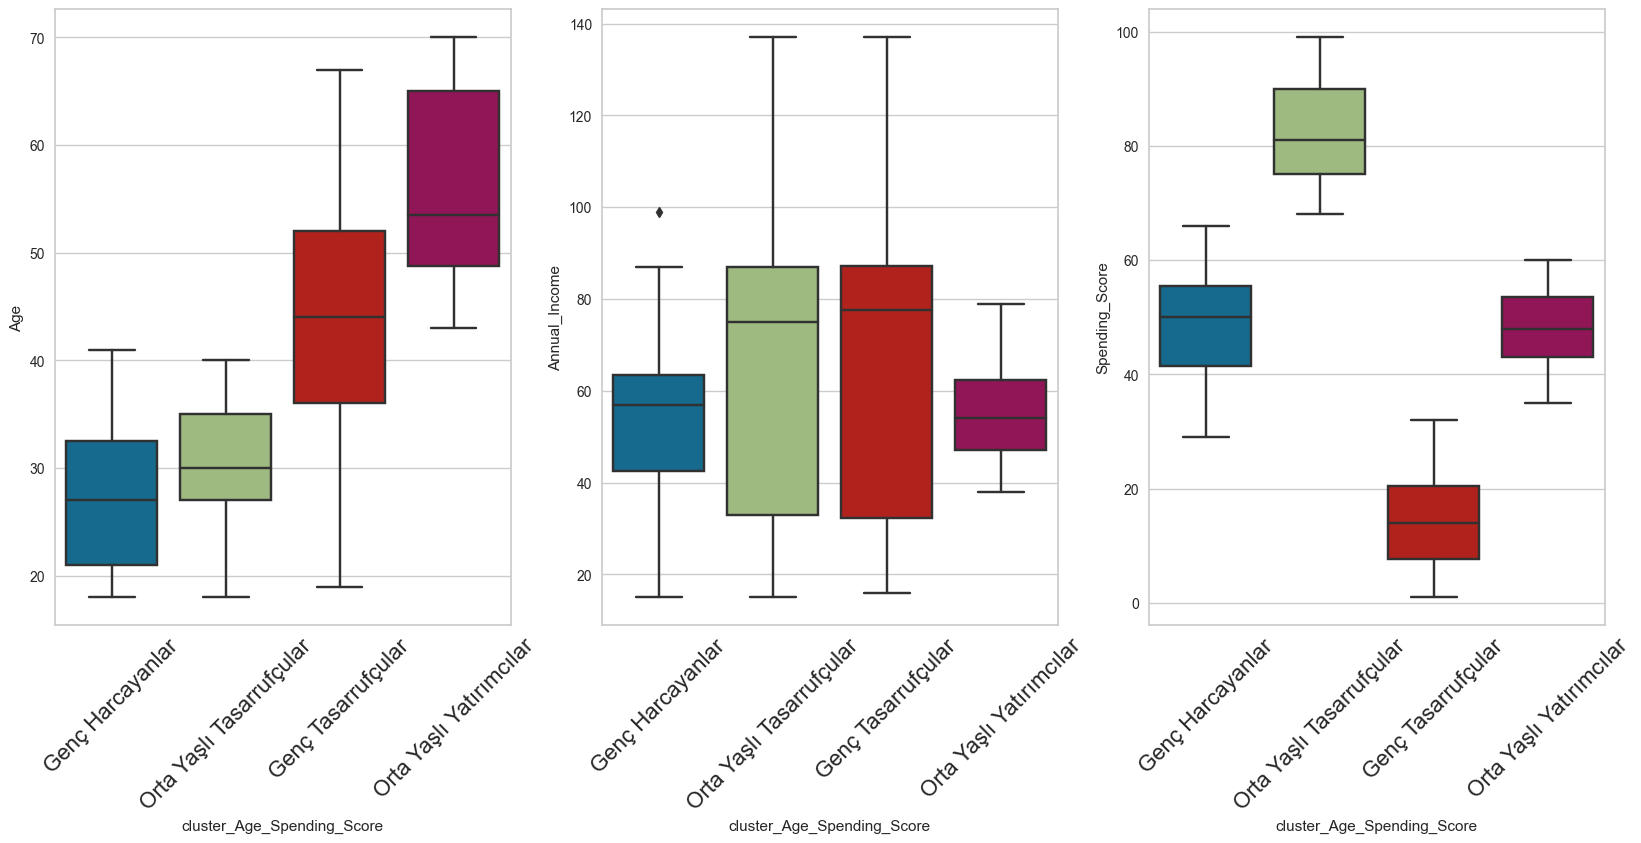

In [178]:
plt.figure(figsize=(20, 8))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16) 

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Age_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16)

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Age_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16)

plt.show()

**Önerilen Müşteri Segment İsimleri:**

**Genç Harcayanlar (cluster 3)**:

**Özellikler**: 

- Genellikle daha genç ve yüksek harcama skoruna sahip müşteriler.

- **Strateji**: 

- Moda ve trend ürünlere odaklanan pazarlama kampanyaları düzenleyin. 
- Sosyal medya ve influencer iş birliklerini artırarak bu gruba yönelik tanıtımlar yapın. 
- Sadakat programlarıyla genç müşterileri elde tutmayı hedefleyin.

**Genç Tasarrufçular (cluster 2)**:

- **Özellikler**: 

- Genç fakat harcama skoru daha düşük olan müşteriler. 

- **Strateji**:

- İndirimler ve özel fırsatlar sunarak bu segmenti harcamaya teşvik edin. Ekonomik ve kullanışlı ürünlere yönelik kampanyalar düzenleyin.
- Ödeme kolaylıkları ve taksit seçenekleri sunarak alışverişi cazip hale getirin.

**Orta Yaşlı Yatırımcılar (cluster 0)**:

- **Özellikler**: 
- Orta yaş grubunda ve harcama skoru yüksek olan müşteriler.
- **Strateji**: 
- Lüks ve kaliteli ürünlere odaklanın. Özel üyelikler veya 
- VIP hizmetler sunarak sadakatlerini artırın. 
- Kişiselleştirilmiş alışveriş deneyimleri sunarak müşteri memnuniyetini en üst düzeye çıkarın.

**Orta Yaşlı Tasarrufçular (cluster 1)**:

- **Özellikler**: 

- Orta yaşta olup harcama skoru düşük müşteriler. 

- **Strateji**: 

- Fiyat/performans ürünü kampanyaları düzenleyin. 
- Uzun vadeli promosyonlar veya paket ürünler sunarak bu segmenti harcamaya teşvik edin.
- Ürün kalitesine vurgu yaparak güven oluşturmaya çalışın.

## Interpretation based on Annual Income and Spending Score- X2

In [182]:
X2 = df[['Annual_Income', 'Spending_Score']]
model_X2 = KMeans(n_clusters =5, random_state=42)
model_X2.fit_predict(X2)
cluster = model_X2.labels_ # predict sonuçları
X2["cluster_Kmeans"] = cluster
X2.head()

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [183]:
X2.cluster_Kmeans.value_counts()

cluster_Kmeans
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

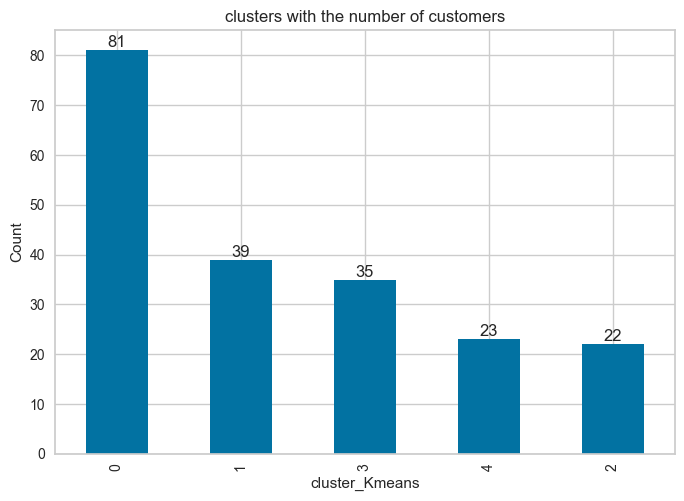

In [184]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [188]:
df2.drop(columns= "cluster_Age_Spending_Score", inplace=True)

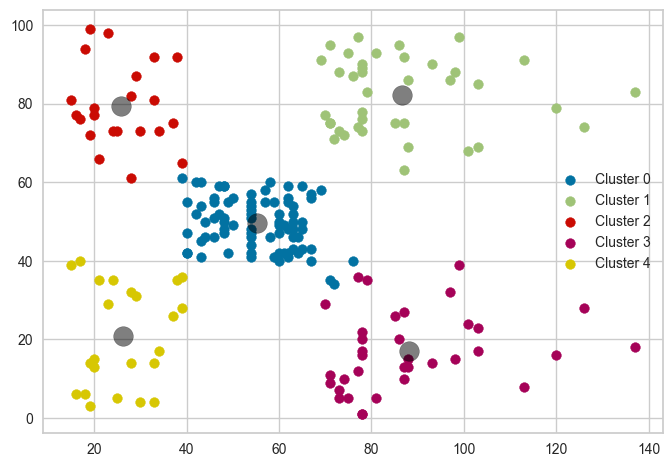

In [187]:
# her bir feature için centroid koordinatlarını bulalım.. Centroid lerin x,y koordinatları
centers = model_X2.cluster_centers_

# Kümeler için ayrı ayrı scatter plot ekleyelim
for cluster_id in range(len(centers)):
    plt.scatter(X2[X2.cluster_Kmeans == cluster_id]['Annual_Income'], 
                X2[X2.cluster_Kmeans == cluster_id]['Spending_Score'], 
                label=f'Cluster {cluster_id}')

# Centroid noktalarını çizelim
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Legend'i göster
plt.legend()
plt.show()

In [190]:
df2["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [191]:
cluster_mapping = {
    0: "Orta Gelirli Orta Harcama",
    1: "Yüksek Gelirli Harcama Tutkunları",
    2: "Düşük Gelirli Harcama Tutkunları",
    3: "Yüksek Gelirli Tasarrufçular",
    4: "Düşük Gelirli Tasarrufçular"
}
# 'cluster_Kmeans' sütunundaki 0, 1, 2, 3 değerlerini yeni isimlerle değiştirin
df2['cluster_Annual_Income_Spending_Score'] = df2['cluster_Annual_Income_Spending_Score'].map(cluster_mapping)

df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,1,Male,19,15,39,Düşük Gelirli Tasarrufçular
1,2,Male,21,15,81,Düşük Gelirli Harcama Tutkunları
2,3,Female,20,16,6,Düşük Gelirli Tasarrufçular
3,4,Female,23,16,77,Düşük Gelirli Harcama Tutkunları
4,5,Female,31,17,40,Düşük Gelirli Tasarrufçular


In [192]:
df2.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,1,Male,19,15,39,Düşük Gelirli Tasarrufçular
1,2,Male,21,15,81,Düşük Gelirli Harcama Tutkunları
2,3,Female,20,16,6,Düşük Gelirli Tasarrufçular
3,4,Female,23,16,77,Düşük Gelirli Harcama Tutkunları
4,5,Female,31,17,40,Düşük Gelirli Tasarrufçular


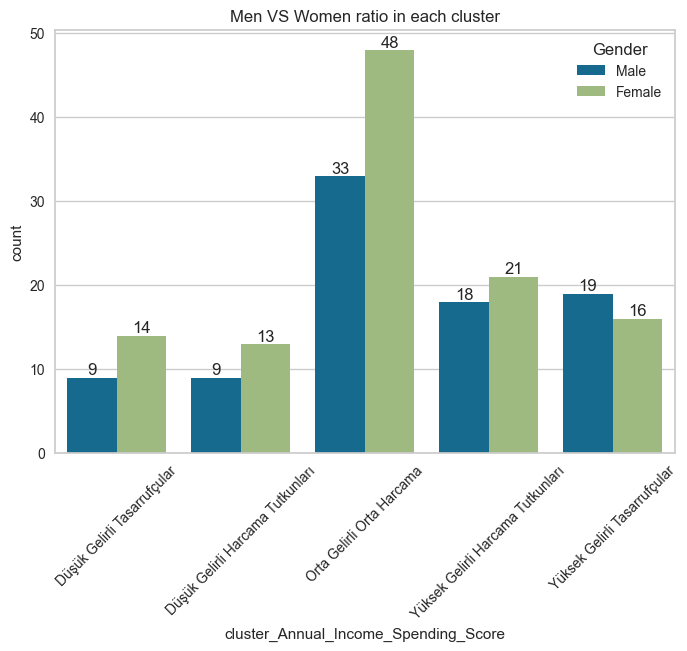

In [193]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df2.cluster_Annual_Income_Spending_Score, hue=df2.Gender)
plt.xticks(rotation=45)
for p in ax.containers:
    ax.bar_label(p)
    
plt.show()

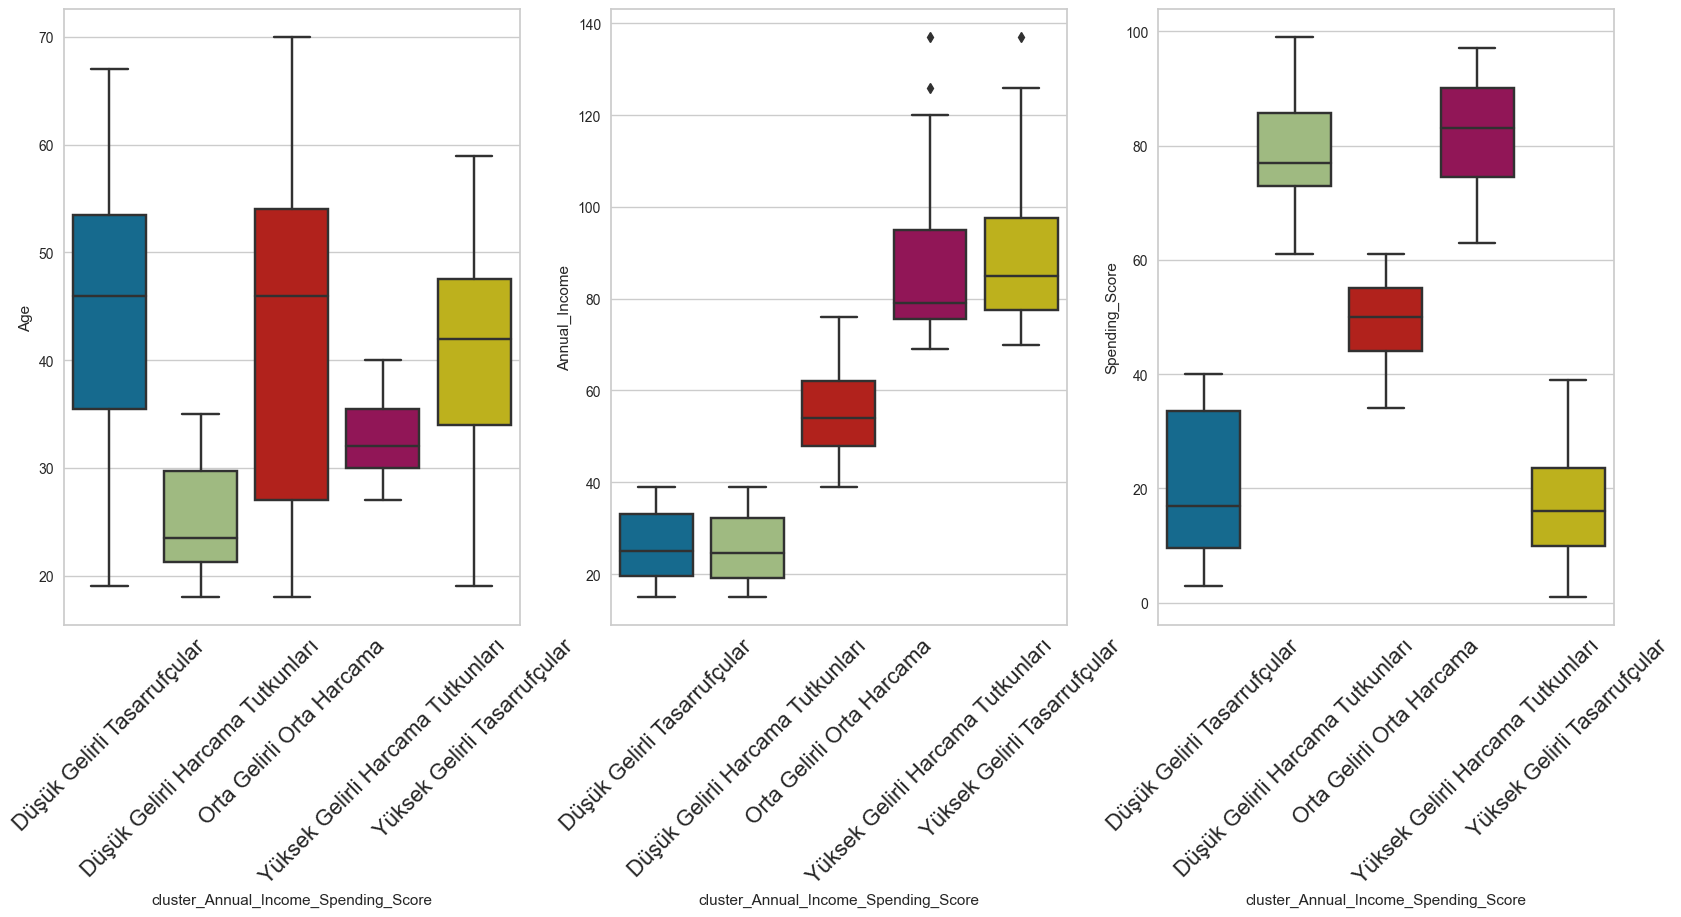

In [194]:
plt.figure(figsize=(20, 8))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16) 

plt.subplot(132)
sns.boxplot(y="Annual_Income", x="cluster_Annual_Income_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16)

plt.subplot(133)
sns.boxplot(y="Spending_Score", x="cluster_Annual_Income_Spending_Score", data=df2)
plt.xticks(rotation=45, fontsize=16)

plt.show()

 Grafik "Annual Income" (Yıllık Gelir) ve "Spending Score" (Harcama Skoru) arasında bir K-Means kümeleme analizi sunuyor. Şimdi, bu kümelere göre segment isimleri ve stratejiler önerelim:

**Önerilen Müşteri Segment İsimleri**:

**Düşük Gelirli Tasarrufçular (cluster 4)**:

- **Özellikler**: 
- Düşük yıllık gelire sahip, harcama skoru düşük müşteriler.
- **Strateji**:
- Fiyat avantajı sağlayan ürünler ve promosyonlar sunarak bu müşterileri kazanmaya çalışın.
- İhtiyaçlarına yönelik ekonomik ürünler sunun.
- Müşterilere değer önerisi sunan mesajlarla iletişim kurun.

**Orta Gelirli Orta Harcama (cluster 0)**:

- **Özellikler**: 
- Orta seviyede bir yıllık gelir ve orta düzeyde bir harcama skoru.
- **Strateji**:
- Orta segment ürünler için hedefli kampanyalar yapın.
- Müşteri sadakatini artırmak için cazip teklifler ve üyelik programları sunun.
- Kalite ve fiyat arasında denge sunan ürünleri ön plana çıkarın.

**Yüksek Gelirli Tasarrufçular (cluster 3)**:

- **Özellikler**:
- Yüksek yıllık gelire sahip ancak düşük harcama yapan müşteriler.
- **Strateji**:
- Lüks ve yatırım değeri olan ürünler sunarak bu müşterilerin ilgisini çekin.
- Kalite ve uzun vadeli değer sunan ürünler hakkında bilgilendirin.
- Özel hizmetler ve premium tekliflerle bu segmentin dikkatini çekin.

**Yüksek Gelirli Harcama Tutkunları (cluster 1)**:

- **Özellikler**: 
- Yüksek yıllık gelir ve yüksek harcama skoruna sahip müşteriler.
- **Strateji**:
- Lüks ürün ve hizmetler sunarak bu segmenti hedefleyin.
- Kişiselleştirilmiş alışveriş deneyimleri ve VIP hizmetler sunun.
- Sadakat programları ve özel indirimlerle müşteri bağlılığını artırın.

**Düşük Gelirli Harcama Tutkunları (cluster 2)**:

- **Özellikler**: 
- Orta düzeyde gelir ve yüksek harcama skoru.
- **Strateji**:
- Ürün çeşitliliği sunarak bu müşterilerin farklı ihtiyaçlarını karşılayın.
- Özel indirimler ve kampanyalarla bu segmentin harcama oranını artırın.
- Kişiselleştirilmiş ürün önerileri ve kampanyalar sunarak müşteri bağlılığını teşvik edin.

**Genel Stratejik Öneriler**:

- Kişiselleştirilmiş Pazarlama: Her segmentin özelliklerine göre kişiselleştirilmiş e-posta kampanyaları ve ürün önerileri sunun.
- Çapraz Satış: Her segmentin ilgi alanlarına göre tamamlayıcı ürünleri önererek çapraz satış yapın.
- Sadakat Programları: Her bir müşteri segmenti için özel sadakat programları geliştirin ve ödüller sunun.
- Çok Kanallı Pazarlama: Müşterilerin hem online hem de fiziksel mağaza deneyimlerini sorunsuz hale getirerek her kanaldan satış yapma fırsatını artırın.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:50%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:dodgerblue;letter-spacing:1px;overflow:hidden"><b> THANK YOU</b></div>